This notebook will take you through the process of an end-to-end Machine Learning project.

# **Cardiovascular Diseases Classifier**

According to World Health Organisation,

* Cardiovascular diseases (CVDs) are the leading cause of death globally.
* An estimated $17.9$ million people died from CVDs in $2019$, representing $32$% of all global deaths. Of these deaths, $85$% were due to heart attack and stroke.
* Out of the $17$ million premature deaths (under the age of $70$) due to noncommunicable diseases in $2019$, $38$% were caused by CVDs.

## What are cardiovascular diseases?

Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels. They include:

* coronary heart disease – a disease of the blood vessels supplying the heart muscle;
* cerebrovascular disease – a disease of the blood vessels supplying the brain;
* peripheral arterial disease – a disease of blood vessels supplying the arms and legs;
* rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;
* congenital heart disease – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart structure from birth; and
* deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.

Heart attacks and strokes are usually acute events and are mainly caused by a blockage that prevents blood from flowing to the heart or brain. The most common reason for this is a build-up of fatty deposits on the inner walls of the blood vessels that supply the heart or brain. Strokes can be caused by bleeding from a blood vessel in the brain or from blood clots.

---

The [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) on Kaggle will be using for the classification of the presence or absence of CVDs.

## The Cardiovascular Disease dataset

Description of the dataset, as available on Kaggle, is as follows.

---

There are 3 types of input features:

> **Objective**: factual information;<br>
> **Examination**: results of medical examination;<br>
> **Subjective**: information given by the patient.

---

Features:

> **age** : Age | Objective Feature | age | int (days) |<br>
> **gender** : Gender | Objective Feature | gender | 1: women, 2: men |<br>
> **height** : Height | Objective Feature | height | int (cm) |<br>
> **weight** : Weight | Objective Feature | weight | float (kg) |<br>
> **ap_hi** : Systolic blood pressure | Examination Feature | ap_hi | int |<br>
> **ap_lo** : Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
> **cholesterol** : Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
> **gluc** : Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
> **smoke** : Smoking | Subjective Feature | smoke | binary |<br>
> **alco** : Alcohol intake | Subjective Feature | alco | binary |<br>
> **active** : Physical activity | Subjective Feature | active | binary |<br>
> **cardio** : Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

---

All of the dataset values were collected at the moment of medical examination.

---

The notebook will begin with the Exploratory Data Analysis, followed by the Machine Learning Model and Fine-tuning.

---

# **1. Import Libraries**

Let's start with importing essential libraries.

In [1]:
import numpy as np              # scientific computing
import pandas as pd             # high-performance data structures
import matplotlib.pyplot as plt # data visualization
import seaborn as sb            # high-level data visualization
import os

---

# **2. Raw Data**

Read the data `.csv` file and put it in a dataframe.

In [2]:
# Import data
cardio_raw = pd.read_csv('cardio_train.csv', sep=';')

# Take a look at some random data points from the dataset
cardio_raw.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
34983,49976,19741,1,165,78.0,120,80,1,1,0,0,1,0
31881,45532,21726,2,174,101.0,130,90,1,1,0,0,1,0
20154,28770,22422,1,160,95.0,120,80,2,1,0,0,1,1
54202,77298,21742,1,166,65.0,150,90,3,1,0,0,1,1
45960,65646,20234,2,166,86.0,150,90,1,1,0,0,0,1
21410,30586,16829,1,156,76.0,120,80,1,1,0,0,1,0
36560,52227,21418,2,172,85.0,110,80,1,2,0,0,1,0
41367,59112,19014,1,163,77.0,120,90,1,1,0,0,1,1
471,678,18032,1,164,54.0,110,90,1,1,0,0,1,0
21428,30615,23126,2,160,60.0,120,80,2,1,0,0,1,1


The `info()` method displays information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [3]:
# Basic information about the dataset
cardio_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are 70,000 instances in the dataset, which is not bad for this Machine Learning project. There is no missing values in this dataset, so we don't have to worry about handling data loss.

---

# **3. Data Preprocessing**

## 3.1. First Glance

Let's make a copy of the dataset to test as we have yet known whether the way we're going to preprocess it is more helpful for the training model or not.

In [4]:
# Create a copy of the dataset
cardio = cardio_raw.copy()

The `id` attribute is not a useful attribute which we can use in our Machine Learning model, so we need to remove this column.

There are **$5$ numerical** attributes which is `age`, `height`, `weight`, `ap_hi`, `ap_lo` and **$6$ categorical** attributes which is `gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`. However, the pandas `.info()` method interpreted all attributes as numerical type. Therefore, we have to convert each of these categorical variables into “category” data type.

Also don't forget to convert the target variable `cardio` into "category" datatype.

In [5]:
# Remove the id column
cardio = cardio.drop(columns='id')

# Convert categorical variables into “category” data type
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create a list that contains numerical attributes
num_attribs = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs:                                # iterate over each categorical attribute
  cardio[cat_attrib] = cardio[cat_attrib].astype('category')  # convert data type

The `describe()` method shows a summary of the numerical attributes.

In [6]:
# Summary of numerical attributes' statistics
cardio.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


The `age` in the raw data is displayed in units of days, which seems unintuitive. It makes more sense to convert it to units of year.

In [7]:
# Convert the age into years
cardio['age'] = cardio['age'] // 365.25

Check the summary statistics visually using `boxplot()`.

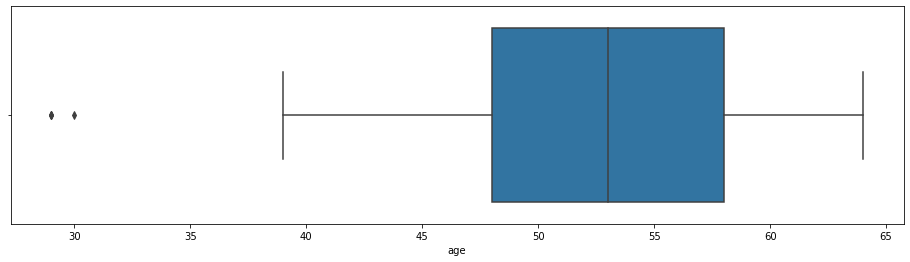

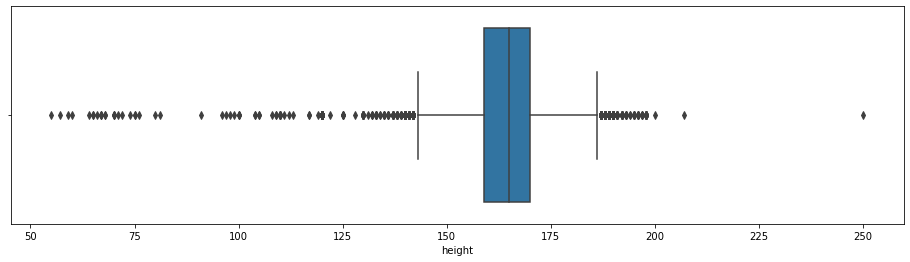

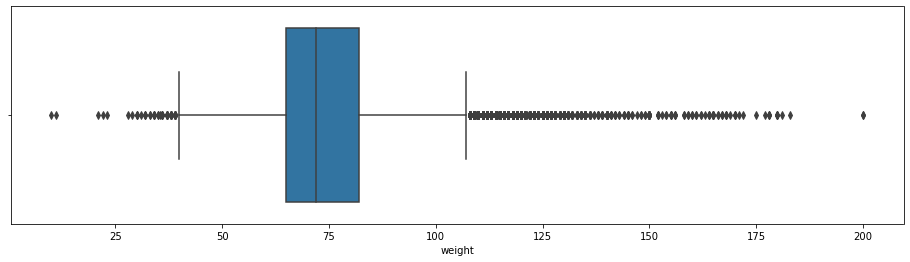

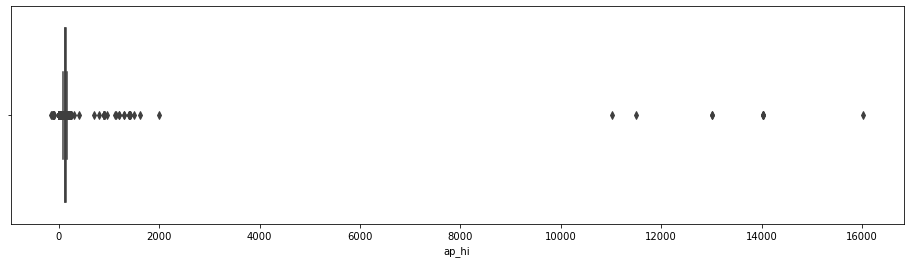

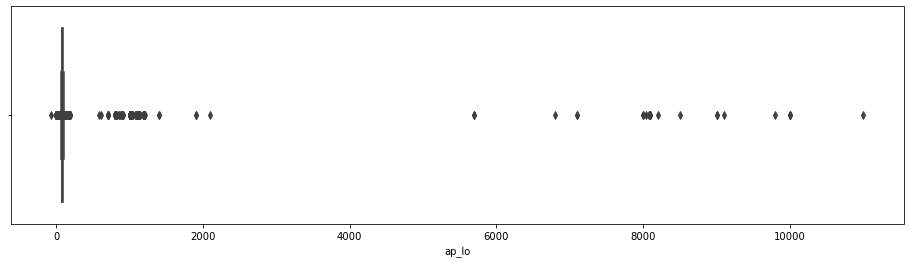

In [8]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(cardio[num_attribs])

# Boxplot of the numeric data
for var in numeric_data:                                      # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))  # setup the frame of the plot
  sb.boxplot(data=cardio, x=var, orient='h')                  # box plot

## 3.2. The Blood Pressure Feature

From the distribution graph of `ap_hi` and `ap_lo` we can see a lot of unusual values since the Systolic and Diastolic blood pressure is bounded between $40$ and $200 mmHg$.

$140 mmHg$ is already considered high blood pressure and values above $200$ shouldn't be humanly possible as it will cause blood vessel to rupture. $60 mmHg$ is considered low blood pressure and a change of $20 mmHg$ can cause fainting and dizziness.

One way to deal with this problem is to omit the training examples whose values ​​of `ap_hi` and `ap_lo` are outside the range $40-200 mmHg$. Let's see how many unusual training examples are there.

A stricter test is to make `ap_lo` in between $40-140 mmHg$.

In [9]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = cardio['ap_hi']
ap_lo = cardio['ap_lo']

# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg")
cardio['cardio'].loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140)].count()

The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg


1303

### 3.2.1. Filter Blood Pressure

We can use condition test to filter out the data outside the range. And use boxplot to examine the distribution

<AxesSubplot:xlabel='ap_lo'>

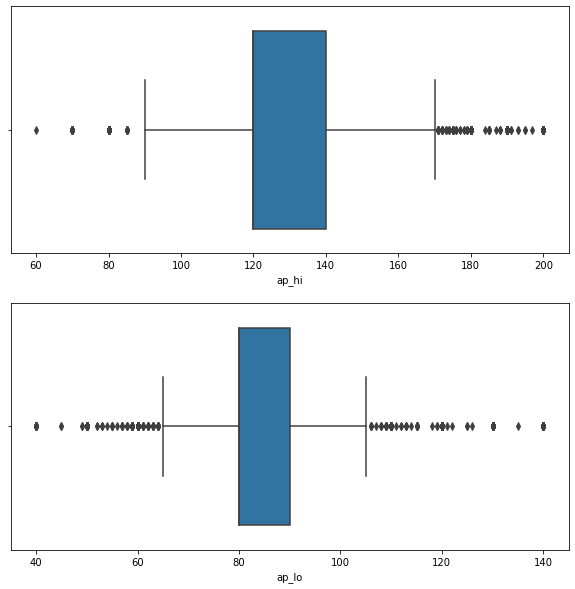

In [10]:
cardio1 = cardio.copy()

cardio1 = cardio1.drop(cardio.loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140)].index)
fig, axes = plt.subplots(nrows=2, figsize=(10,10))
sb.boxplot(data=cardio1, x='ap_hi', ax=axes[0], orient='h')
sb.boxplot(data=cardio1, x='ap_lo', ax=axes[1], orient='h')

### 3.2.2. Categorize Blood Pressure

That's almost $2$% of the dataset!

We don't want to lose that much data just based on excluding training examples with abnormal blood pressure values. We have yet known if blood pressure is the dominant factor determining the outcome of the diagnosis. Therefore, we will go for another solution which is converting Systolic and Diastolic blood pressure to "category" data type.

The values ​​of blood pressure will be ranked as in the following table:

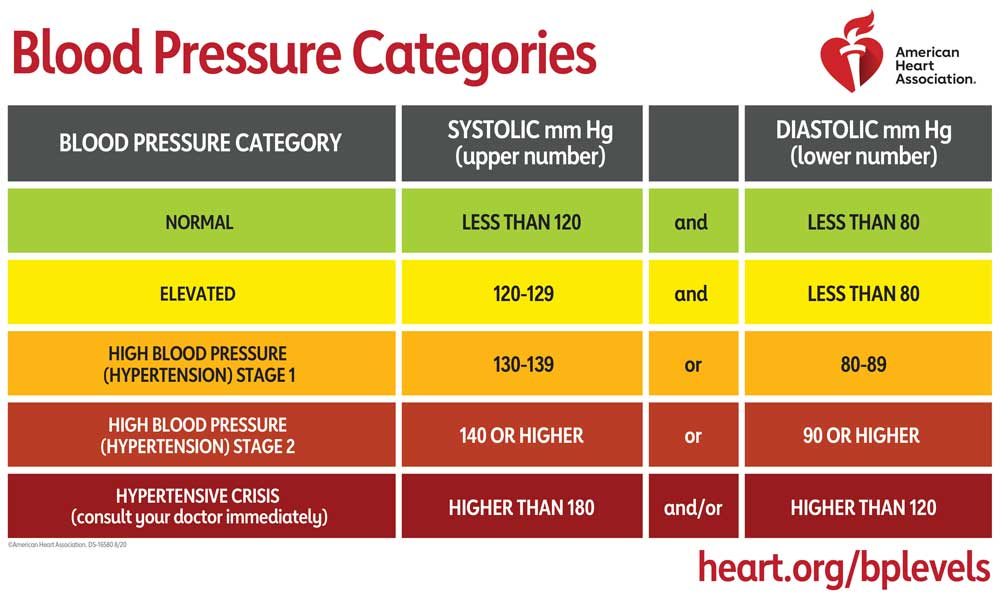

Assign the $5$ stages of the blood pressure category for the corresponding range from $1$ to $5$:


1.   Normal
2.   Elevated
3.   High blood pressure (hypertension) Stage $1$
4.   High blood pressure (hypertension) Stage $2$
5.   Hypertensive crisis (consult your doctor immediately)



In [11]:
# Rank Systolic blood pressure
cardio.loc[ap_hi < 120, 'ap_hi'] = 1
cardio.loc[(ap_hi >= 120) & (ap_hi < 130), 'ap_hi'] = 2
cardio.loc[(ap_hi >= 130) & (ap_hi < 140), 'ap_hi'] = 3
cardio.loc[(ap_hi >= 140) & (ap_hi <= 180), 'ap_hi'] = 4
cardio.loc[ap_hi > 180, 'ap_hi'] = 5

# Rank Diastolic blood pressure
cardio.loc[ap_lo < 80, 'ap_lo'] = 1
cardio.loc[(ap_lo >= 80) & (ap_lo < 90), 'ap_lo'] = 3
cardio.loc[(ap_lo >= 90) & (ap_lo <= 120), 'ap_lo'] = 4
cardio.loc[ap_lo > 120, 'ap_lo'] = 5

Rank blood pressure, append new column of blood pressure `bp` to `cardio` dataframe and drop `ap_hi`, `ap_lo` columns.

In [12]:
# Rank blood pressure and append it to the dataframe
bp = pd.DataFrame(cardio[['ap_hi', 'ap_lo']])
cardio['bp'] = bp.max(axis=1).astype('category')

# Drop ap_hi, ap_lo columns
cardio = cardio.drop(columns=['ap_hi', 'ap_lo'])

# Update categorical and numerical attributes
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio']
num_attribs = ['age', 'height', 'weight']

## 3.3. Univariate Analysis

### 3.3.1. Numerical Attributes

Visualize the summary of uni-variate Distributions of each numerical attribute using `boxplot()`, `histplot()` and `violinplot()`.

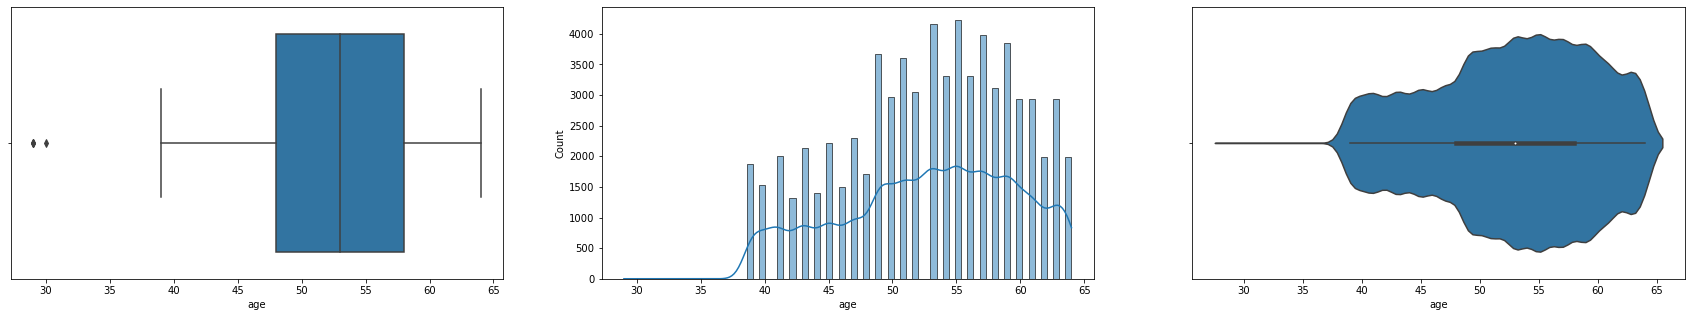

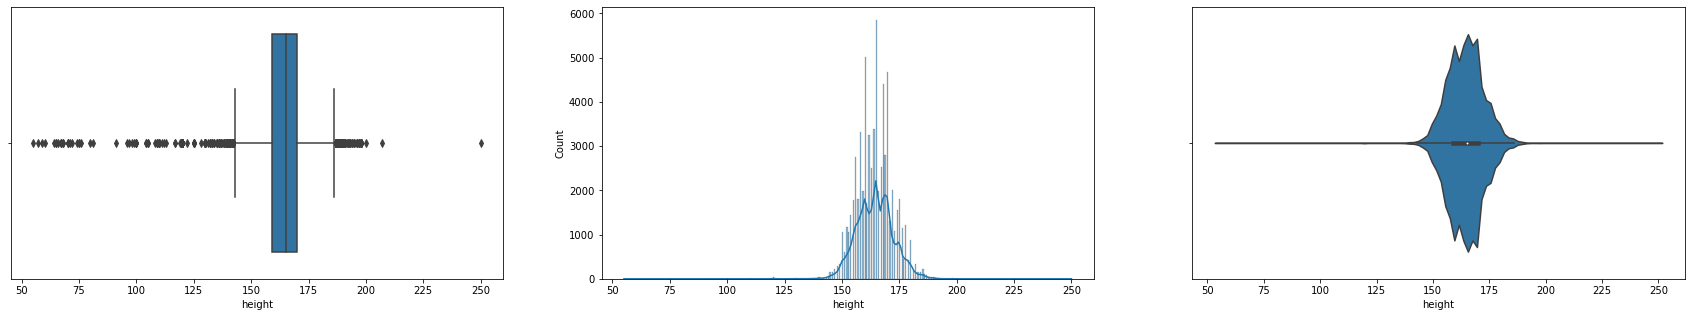

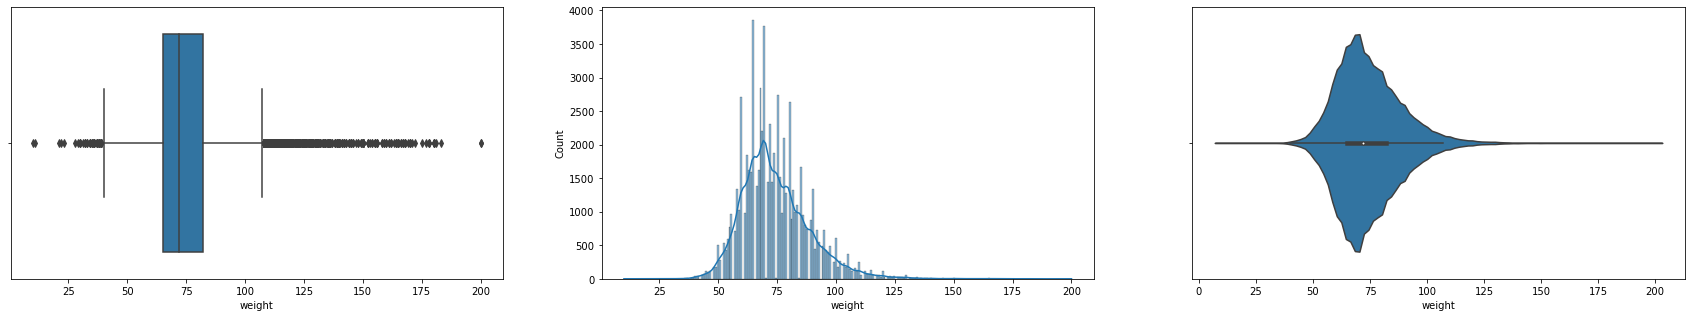

In [13]:
# Univariate analysis
for num_attrib in num_attribs:                                     # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))       # setup the frame of the plot
  sb.boxplot(data=cardio, x=num_attrib, orient='h', ax=axes[0])    # box plot
  sb.histplot(data=cardio[num_attrib], kde=True, ax=axes[1])       # histogram with Kernel Density Estimators (KDE)
  sb.violinplot(data=cardio, x=num_attrib, orient='h', ax=axes[2]) # violin plot

The majority of patients whose information was provided in the dataset are:


*   Between the ages of $39$ and $64$ years old
*   Between the heights of $145$ and $185 cm$
*   Between the weights of $40$ and $105 kg$


It also can be seen that `height` and `weight` have a lot of outliers but these points are still in a reasonable range. For the purpose of learning, we will intentionally keep those outliers and see how they will affect the model.

### 3.3.2. Categorical Attributes

In [14]:
# Convert gender to binary categorical attribute
cardio['gender'] = (cardio['gender'].astype('int') - 1).astype('category')

Use `catplot()` to visualize the distribution of each category in a categorical attribute.

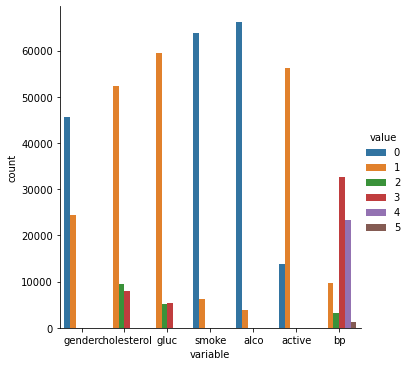

In [15]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio, value_vars=cat_attribs[:-1])             # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', data=cat_df, kind='count')  # categorical plot

It seemed that in the dataset, the majority of people:


*   Have normal cholesterol and glucose level
*   Neither smoke nor drink alcohol
*   Regularly do physical activities
*   Have high blood pressure (either stage $1$ or $2$)


The target variable `cardio` has a balanced between positive and negative examples. The ratio of female to male is $1.8:1$.

---

# **4. Exploratory Analysis**

So far we have taken a glance at the data to get the general understanding. We have also cleaned the data to make it easier to use for the following steps.

In this part of the notebook, we will be exploring further the **Cardiovascular Disease Dataset**.

## 4.1. Bivariate Analysis

### 4.1.1. Numerical Attributes

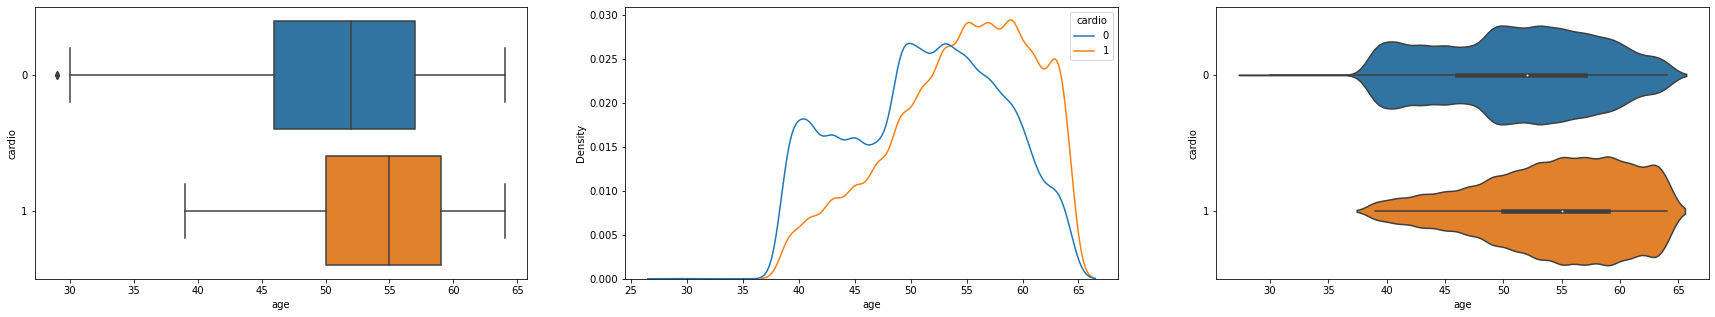

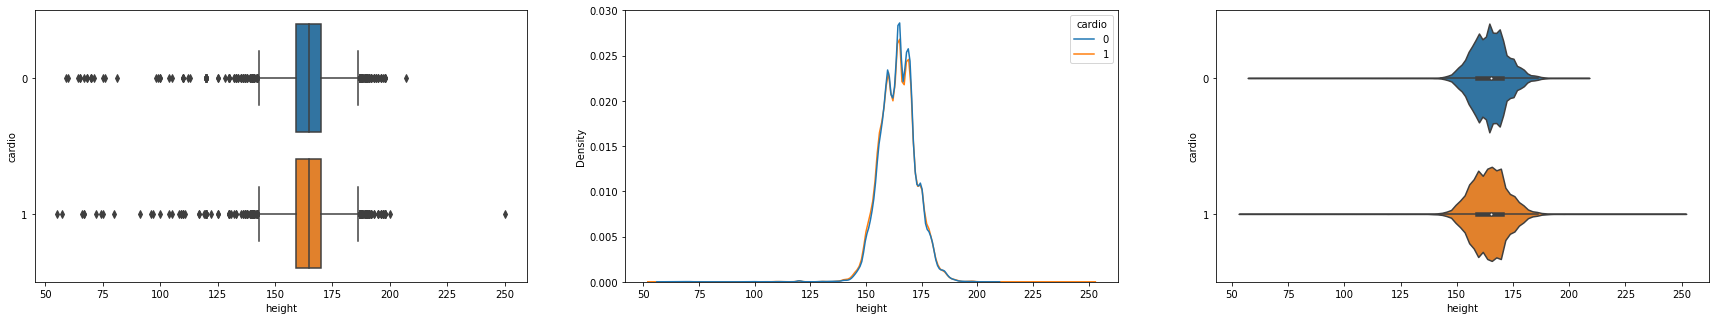

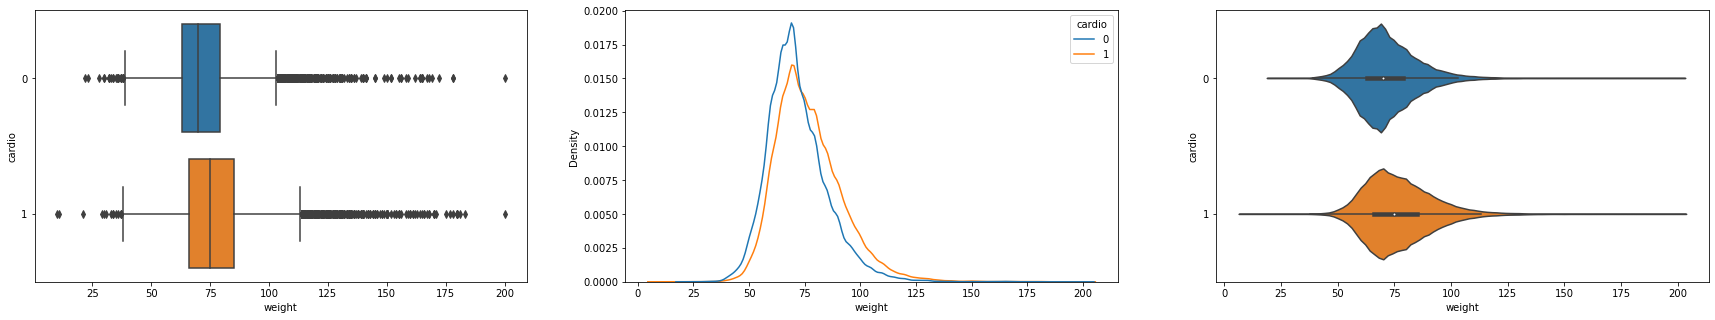

In [16]:
# Bivariate analysis with respect to target class
for num_attrib in num_attribs:                                                           # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))                             # setup the frame of the plot
  sb.boxplot(data=cardio, x=num_attrib, y='cardio', orient='horizontal', ax=axes[0])     # box plot
  sb.kdeplot(data=cardio, x=num_attrib, hue='cardio', ax=axes[1])                        # kde plot
  sb.violinplot(data=cardio, x=num_attrib, y='cardio', orient='horizontal', ax=axes[2])  # violin plot

It can be seen that the distribution of `age` has a noticable difference between those who have CVD and those who don't. In contrast, the distributions of `height` and `weight` do not show the difference between those with CVD and those without, the distributions of positive and negative class almost overlap for both `height` and `weight`.

This means that `age` might be a good factor to distinguish between CVD and non-CVD patients while `height` and `weight` are unlikely to play an important role in predicting the target class.

Let's take a look at how `age` spreads along the target class.

<AxesSubplot:xlabel='age', ylabel='count'>

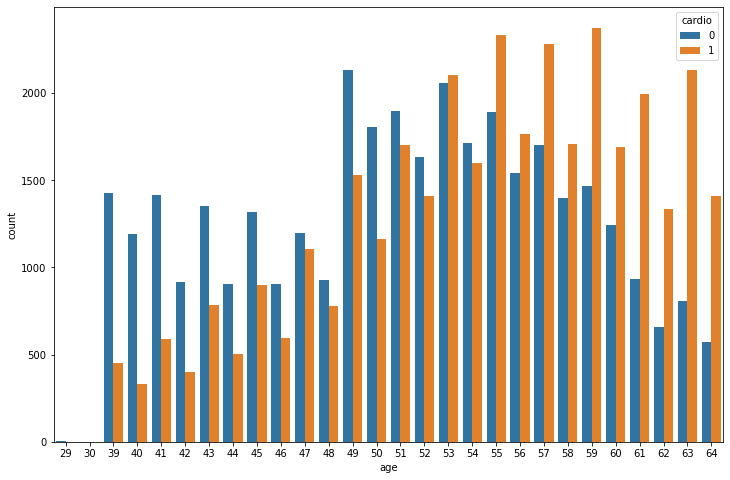

In [17]:
# Count plot of age over target class
fig = plt.subplots(figsize=(12,8))                # setup the frame of the plot
sb.countplot(x='age', hue='cardio', data=cardio)  # count plot

We can observe that after the age of $55$, patients are more exposed to CVD.

### 4.1.2. Categorical Attributes

Use `catplot()` to observe the correlations between categorical attributes and the target variable `cardio`.

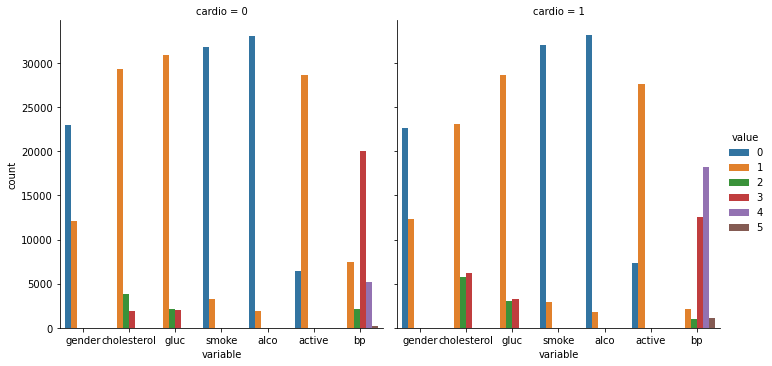

In [18]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio, id_vars=['cardio'], value_vars=cat_attribs[:-1])       # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')  # categorical plot

It can be seen that patients with CVD have higher cholesterol, glucose and blood pressure level.

Another way of doing this is by using `heatmap()`.

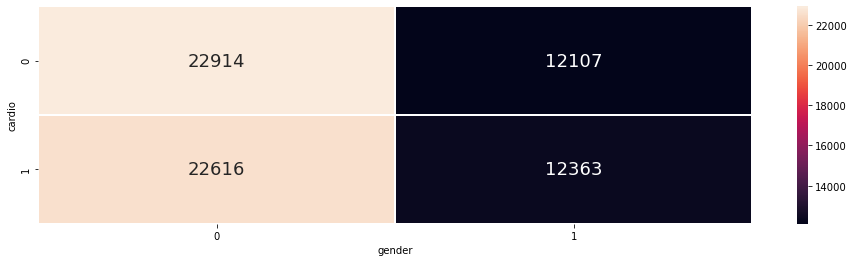

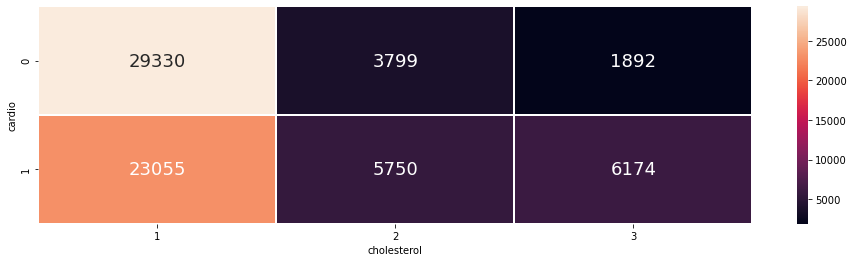

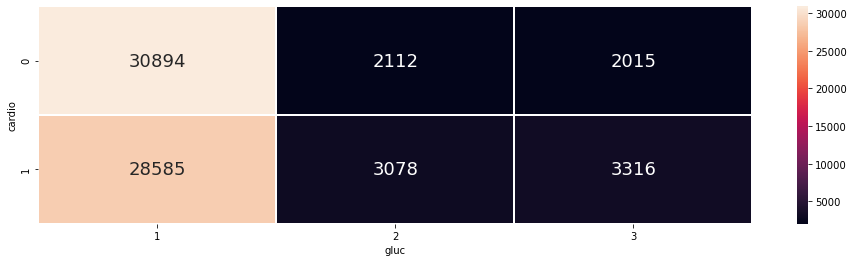

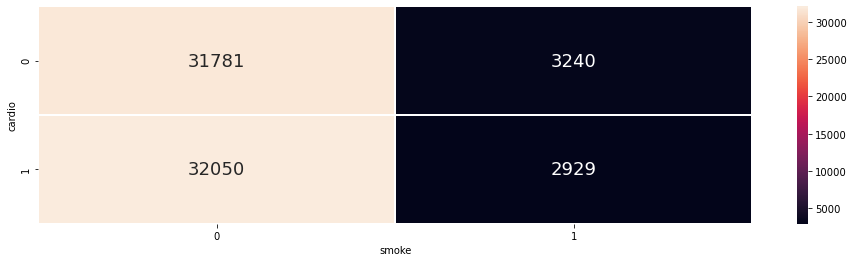

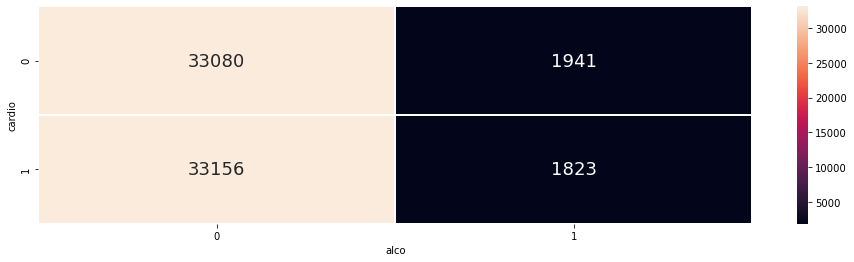

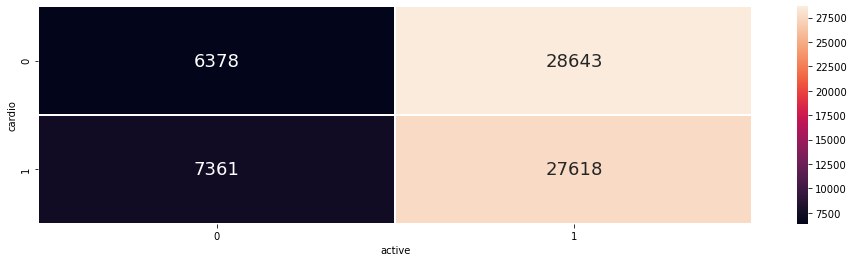

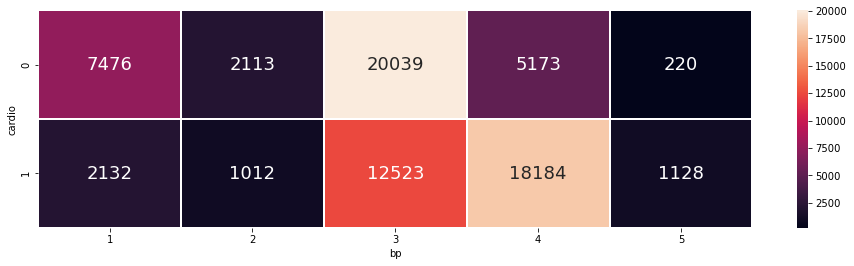

In [19]:
# The relationship between the presence and absence of CVDs and categorical attributes
for cat_attrib in cat_attribs[:-1]:                                       # iterate over categorical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))              # setup the frame of the plot
  sb.heatmap(cardio.groupby(['cardio', cat_attrib]).size().unstack(),
             linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f') # heat map

The ratio of patients with CVD to those without is:


*   Approximately $1/1$ for both genders
*   Slightly smaller than $1$ among patients with normal cholesterol and/or glucose levels but noticable among patients with above and well above normal levels
*   Approximately the same for both smokers and non-smokers
*   Approximately the same for both patients who drink alcohol and who don't
*   Approximately the same for both active and inactive patients
*   Significant for each level of blood pressure:
    *   Normal: $1/3$
    *   Elevated: $1/2$
    *   High blood pressure Stage $1$: $2/3$
    *   High blood pressure Stage $2$: $7/2$
    *   Hypertensive crisis: $5/1$



The following code cell will show the correlations between `gender` and other categorical attributes as well as the target class.

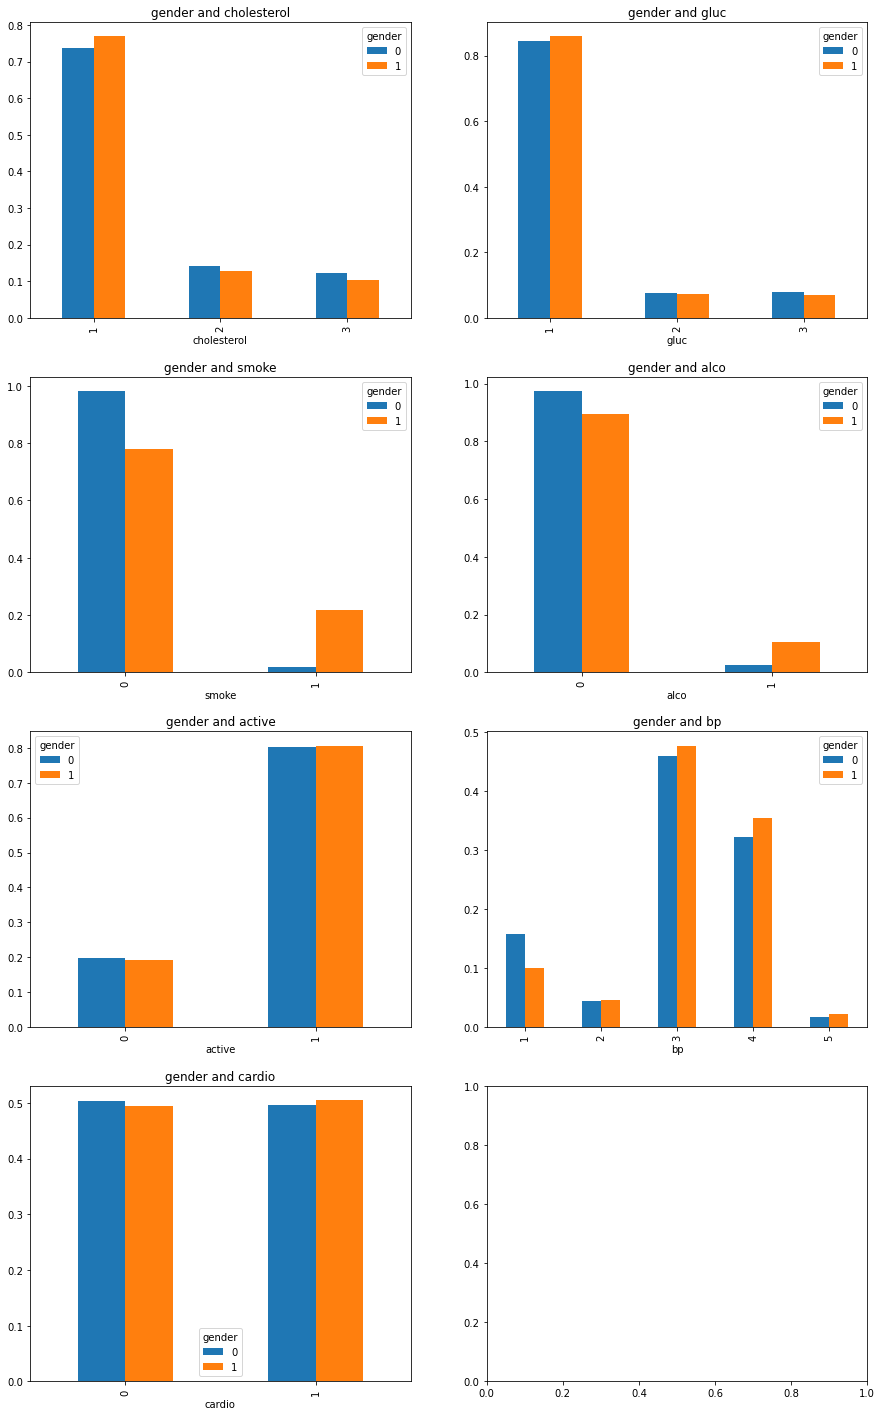

In [20]:
# Explore Gender
def bardualplot(df, grouping, target, axesx, axesy):
    # Percentage of each group on every target categorical variable
    df[cat_attribs].groupby(grouping)[target].value_counts(normalize=True).unstack(0).plot.bar(ax=axes[axesx][axesy]) # group gender with each categorical attribute
    axes[axesx][axesy].set_title(grouping + ' and ' + target)                                                         # title each plot

# Setup the frame of the plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,25))

count = 0
for cat_attrib in cat_attribs[1:]:                                  # iterate over categorical attributes
  bardualplot(cardio, 'gender', cat_attrib, count // 2, count % 2)  # plot dual bars
  count += 1

From the above barplots, it is shown that male patients having alcohol and smoking in the dataset is higher than female. However, in this dataset the percentage of a given gender having CVD is almost the same.

## 4.2. Correlations

Let's take a look at the correlation matrix. Treating categorical attributes as float.

<AxesSubplot:>

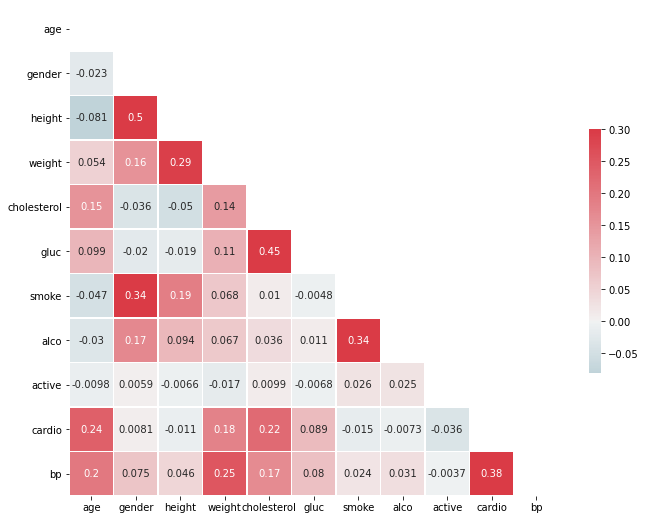

In [21]:
# Calculate the correlations between attributes
corr = cardio.astype('float').corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(11,9))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

It seems like blood pressure (`bp`) has the highest correlation with the target class. Followed by `age`, `cholesterol` and `weight`, but these features are not very high correlated with the target class.

## 4.3. Experimenting with Attribute Combinations

We can try out various attribute combinations before preparing the data for Machine Learning algorithm to see whether those combinations are seemed to be more useful than a bunch of separeted attributes.<br>

Let's make a copy of the dataset to test as we don't know if the attribute combinations that we're going to create are more helpful for the training model or not. And if they're not, we don't want that to affect the original dataset.

In [22]:
# Create a copy of the dataset
cardio_exp = cardio.copy()

### 4.3.1. Body Mass Index (BMI)

Here, we consider the [Body Mass Index (BMI)](https://en.wikipedia.org/wiki/Body_mass_index) of the patient, which can be derived from the formula:<br>

$$BMI = \frac{weight}{height \times height}$$

,where $weight$ is the weight of the patient in the units of $kilogram$ ($kg$), $height$ is the height of the patient in the units of $meter$ ($m$).

With the above formula, we will calculate and introduce a new attribute `bmi`.

<AxesSubplot:xlabel='bmi'>

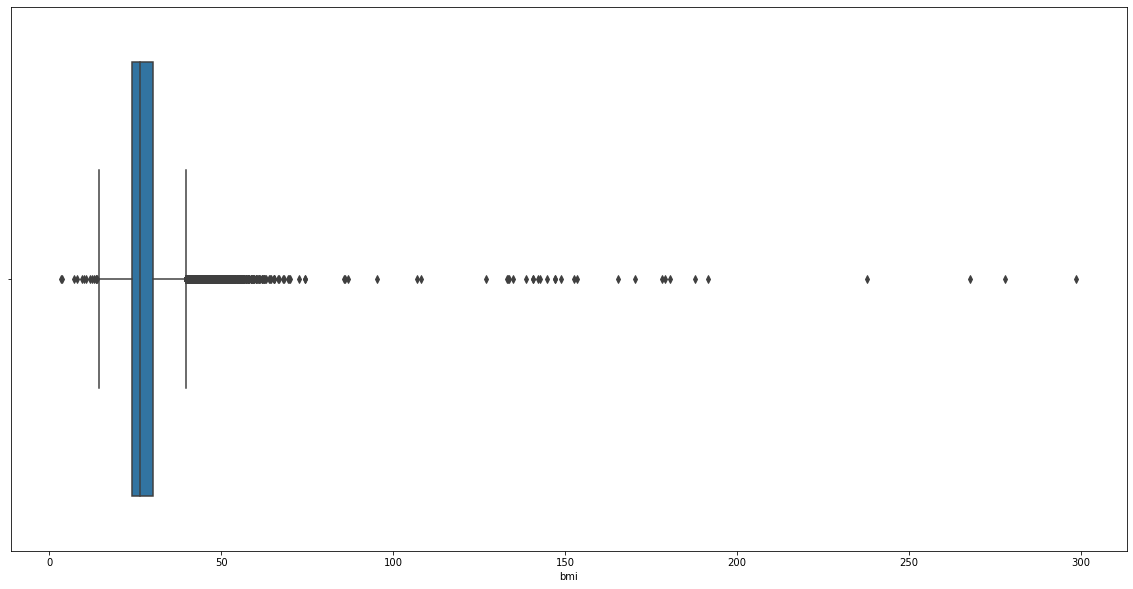

In [23]:
# Caculate bmi for every patients
cardio_exp['bmi'] = cardio_exp['weight'] / (cardio_exp['height'] / 100) ** 2

# Visualize the distribution of the bmi
fig = plt.figure(figsize=(20,10))                 # setup the frame of the plot
sb.boxplot(data=cardio_exp, x='bmi', orient='h')  # boxplot

There are many outliers in BMI The humanly possible value of BMI is between $10$ and $80$.

<AxesSubplot:xlabel='bmi'>

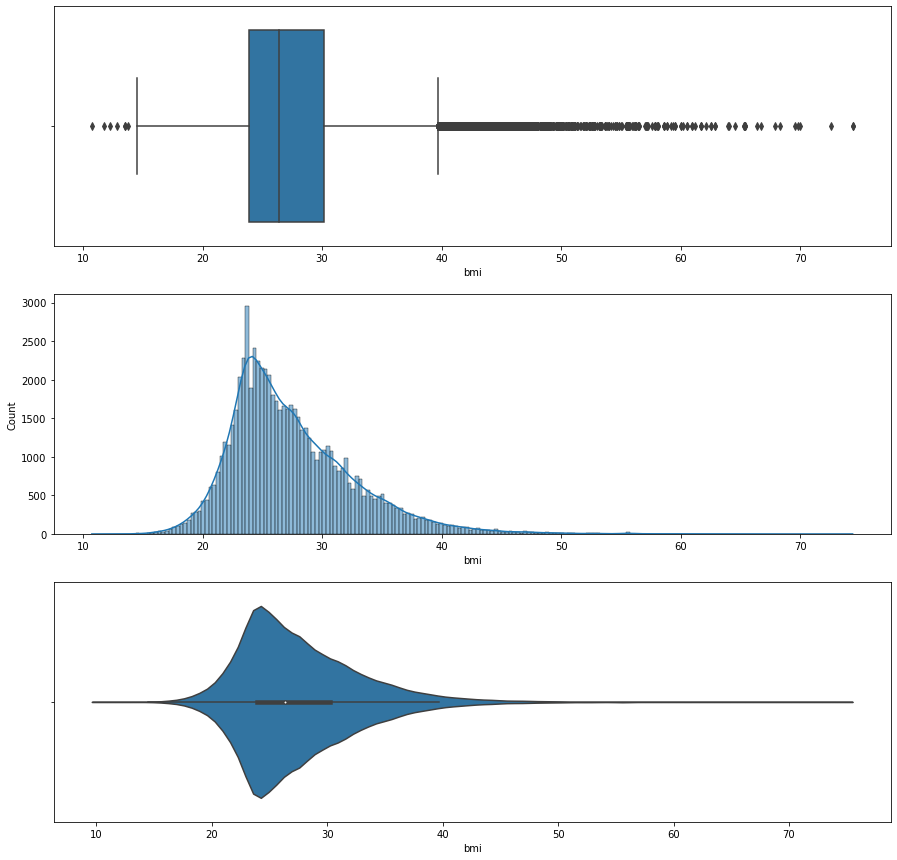

In [24]:
# Extract feature bmi from the dataset
bmi = cardio_exp['bmi']

# Drop outliers
cardio_exp = cardio_exp.drop(cardio_exp.loc[(bmi < 10) | (bmi > 80)].index)

# Visualize the distribution of the bmi
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))     # setup the frame of the plot
sb.boxplot(data=cardio_exp, x='bmi', orient='h', ax=axes[0])    # box plot
sb.histplot(data=cardio_exp['bmi'], kde=True, ax=axes[1])       # histogram with kde
sb.violinplot(data=cardio_exp, x='bmi', orient='h', ax=axes[2]) # violin plot

### 4.3.2. Categorize BMI


From BMI, we can construct categories of obesity, which is more commonly use. The categories of this categorical attribute are as follow:


1.   Underweight ($BMI < 18.5$)
2.   Healthy Weight ($18.5 <= BMI < 25$)
3.   Overweight ($25 <= BMI < 30$)
4.   Obese ($BMI >= 30$)



In [25]:
# Extract feature bmi from the dataset
bmi = cardio_exp['bmi']

# Rank BMI
cardio_exp['obesity'] = 1                                 # initiate every training examples to underweight
cardio_exp.loc[(bmi >= 18.5) & (bmi < 25), 'obesity'] = 2 # healthy weight
cardio_exp.loc[(bmi >= 25) & (bmi < 30), 'obesity'] = 3   # overweight
cardio_exp.loc[bmi >= 30, 'obesity'] = 4                  # obese

# Change data type to 'category'
cardio_exp['obesity'] = cardio_exp['obesity'].astype('category')

The distribution of categorical attribute `obesity`.

Stage of Obesity: 4
2    25667
3    25209
4    18441
1      644
Name: obesity, dtype: int64


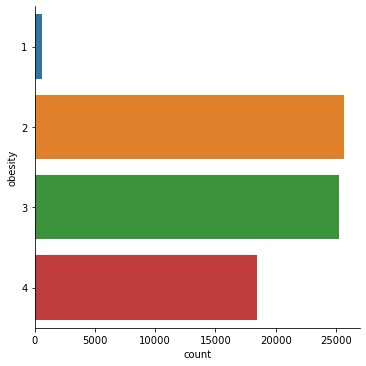

In [26]:
# Print the number of unique categories in bmi
print("Stage of Obesity:", len(cardio_exp['obesity'].unique()))

# Plot the count of each category in bmi
print(cardio_exp['obesity'].value_counts())             # count the number of each category
sb.catplot(y='obesity', data=cardio_exp, kind='count')  # categorical plot

We can take a look on how this new feature `obesity` correlates with the target variable `cardio` using `heatmap()`.

<AxesSubplot:xlabel='obesity', ylabel='cardio'>

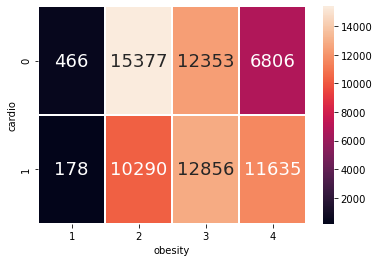

In [27]:
# Plot heatmap between target class and obesity
sb.heatmap(cardio_exp.groupby(['cardio', 'obesity']).size().unstack(),
           linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f')

Base on the obesity rating we observe that:


*   For underweight and healthy patients, the majority don't have disease
*   For overweight patients, the number of people have and don't have disease is about the same
*   For obese patients, the majority has disease


This attribute might be useful.

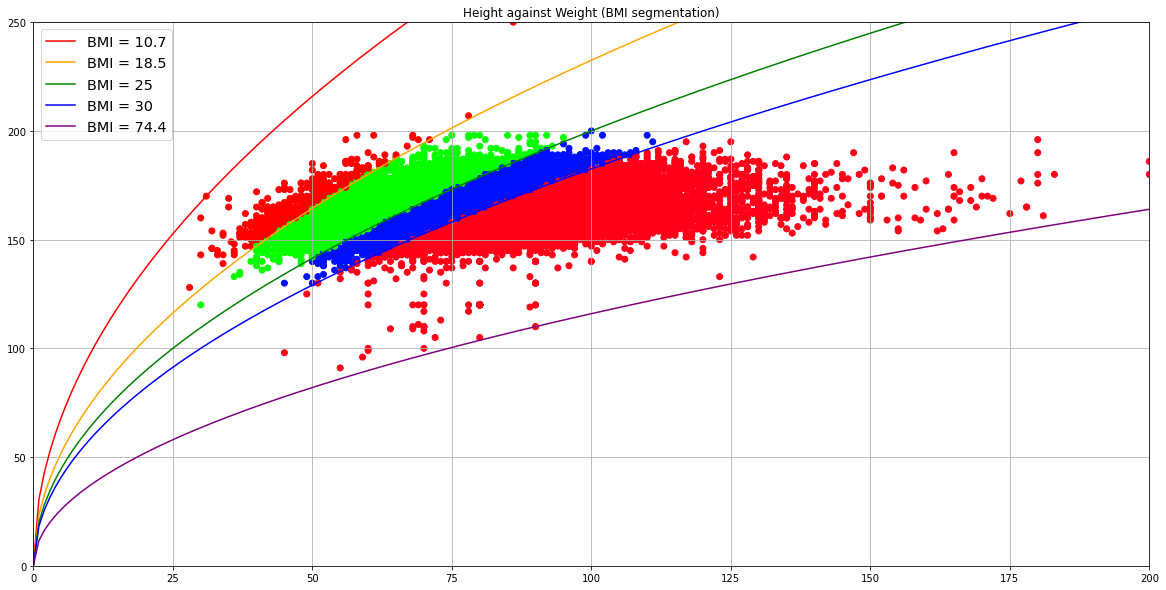

In [28]:
# Plot the BMI graph for visualization
fig = plt.figure(figsize = (20,10))
plt.scatter(x='weight', y='height', c='obesity', data=cardio_exp, cmap='hsv', label="")

x_val = np.arange(0,300)
plt.plot(x_val,np.sqrt(x_val/bmi.min())*100, c='red', label="BMI = "+str(round(bmi.min(),1)))
plt.plot(x_val,np.sqrt(x_val/18.5)*100, c='orange', label="BMI = 18.5")
plt.plot(x_val,np.sqrt(x_val/25)*100, c='green', label="BMI = 25")
plt.plot(x_val,np.sqrt(x_val/30)*100, c='blue', label="BMI = 30")
plt.plot(x_val,np.sqrt(x_val/bmi.max())*100, c='purple', label="BMI = "+str(round(bmi.max(),1)))

plt.xlim([0, cardio_exp['weight'].max()])
plt.ylim([0, cardio_exp['height'].max()])
plt.title("Height against Weight (BMI segmentation)")
plt.legend(fontsize='x-large')
plt.grid(True)
plt.show()

## 4.4. Clustering

From the perspective of categorical separation:


*   Blood pressure categories is a threshold separation
*   BMI uses analytical function (quadratic) function to separate data


However, with machine learning clustering algorithm, we can cluster large number of data and multi dimensional data.

We will try K-means. [K-means Clustering](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) uses distance between points to cluster them.

### 4.4.1. K-means on Height, Weight

We want to scale the data because we don't want the range of any feature affecting the distance from the centroid calculated.

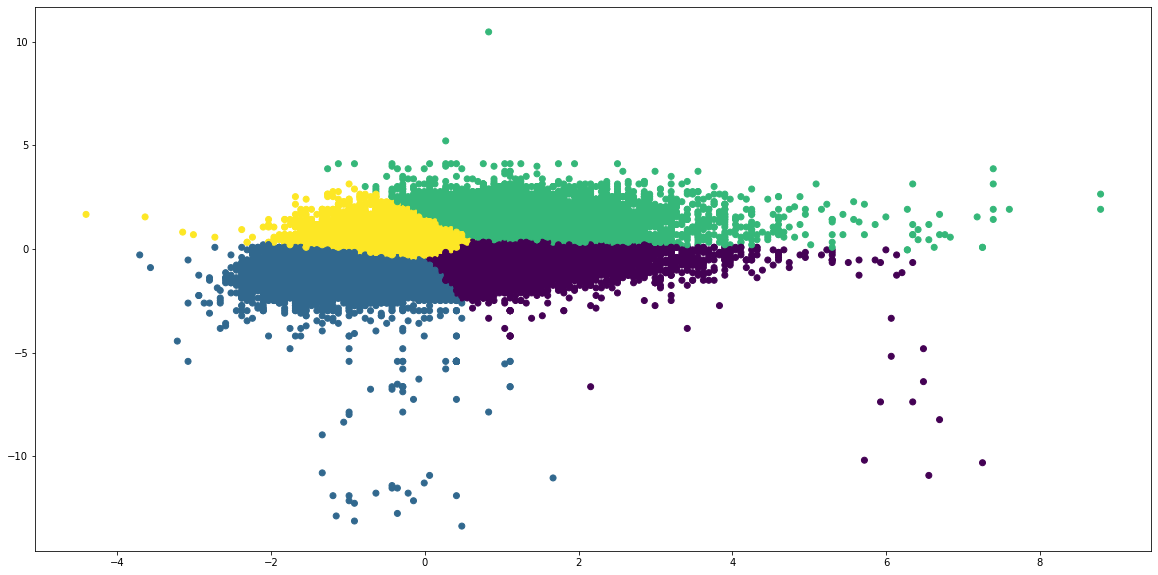

In [29]:
# Import Libraries
from sklearn.cluster import KMeans                # clustering model
from sklearn.preprocessing import StandardScaler  # scaler

# Create scaler object
scale = StandardScaler()

# Extract feature height and weight from the dataset
hw = pd.DataFrame(cardio1[['weight','height']])

# Scale features
hw[['weight','height']] = scale.fit_transform(hw[['weight','height']])

# KMeans clustering model
kmean = KMeans(n_clusters=4, init='k-means++', n_init=10) # create kmeans clustering object
kmean.fit(hw)                                             # train the kmeans clustering model

# Predict clusters
labels = kmean.predict(hw)
hw_cluster = hw.copy()
hw_cluster['Cluster'] = pd.Categorical(labels)

# Visualize clusters using scatter plot
fig1 = plt.figure(figsize=(20,10))
plt.scatter(x='weight', y='height', c='Cluster', data=hw_cluster)

### 4.4.2. K-means on Numerical Attributes

We will now implement k-means on all $5$ numerical attributes, taking advantage of the the algorithm ability to deal with multi-dimension variables.

<AxesSubplot:xlabel='Cluster', ylabel='count'>

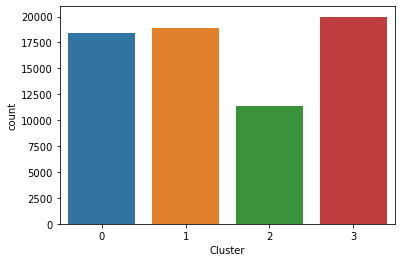

In [30]:
# Extract the features from the dataset
X = pd.DataFrame(cardio1[num_attribs]) 
X[num_attribs] = scale.fit_transform(X[num_attribs])

# Guess the number of clusters
num_clust = 4

# Create clustering model using KMeans
kmeans = KMeans(n_clusters=num_clust, init='k-means++', n_init=5)

# Fit the clustering model on the dataset
kmeans.fit(X)

labels = kmeans.predict(X)

# Append labels to the dataset
X_labeled = X.copy()
X_labeled['Cluster'] = pd.Categorical(labels)

# Summary of the cluster labels
sb.countplot(x=X_labeled['Cluster'])

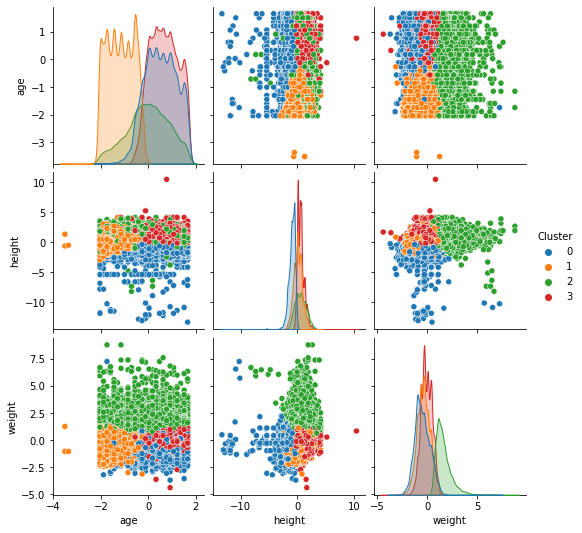

In [31]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars=X.columns.values, hue='Cluster')

As seen in the BMI graph and due to BMI calculation, BMI clusters are segmented using the a quadratic formula:

$$BMI = \frac{weight}{height \times height}$$

K-means clustering method finds a center point of a cluster. Therefore, it cannot produce the curves like BMI calculation

BMI and threshold categorisation are intuitive and are done by human. They are the result of human effort in categorising data prior to the advent of ML (BMI in $19$<sup>th</sup> century). Like machine learning, people try to learn and pick out the pattern from various data. The model the originator of BMI used was a simple quadratic formula. However, in the past, they lack the tools for big data collection and analysis. Hence many even questioned the effectiveness of BMI.

We see that there is a slight correlation with disease as explored earlier, some are questioning the usefulness of such a simplistic BMI calculation to categorize Hence, it stills serve as a good rules of thumb.

For the clusters that we find using $5$ features, we cannot validate their relevance because we are not medical professionals.

---

# **5. Prepare the Data for Machine Learning Algorithms**

At this stage, we will separate the predictors and labels as well as split the dataset into training set and test set. In addition, we will also perform feature scaling technique in order to help Machine Learning models learn better from the dataset.

In [32]:
# Separate the dataset
cardio_label = pd.DataFrame(cardio['cardio']) # label
cardio = cardio.drop('cardio', axis=1)        # predictors

## 5.1. Feature Scaling

Very often, Machine Learning don't perform well when the input numerical attributes have very different scales. In this **Cardiovascular Disease dataset**, the range of each numerical attribute is as follow.

Let's check the statistical summary of numerical attributes again.

In [33]:
# Summary of numerical attributes' statistics
cardio.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.803257,6.762462,29.0,48.0,53.0,58.0,64.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0


Although the scales of the input numerical attributes are not too different, we will still rescale them because it is a good practice to do so.

We will be using [Standardization Scaling](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf).

In [34]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Define scaler object
scaler = StandardScaler()

# Scale numerical attributes
cardio[num_attribs] = scaler.fit_transform(cardio[num_attribs])

## 5.2. Split the Dataset

Now, let's split the dataset into two parts:


1.   Training set for training models
2.   Test set for evaluating models


with the ratio $\frac{training\space set}{test\space set} = \frac{8}{2}$ and a random state to get the same datasets everytime running.

In [35]:
# Import splitter
from sklearn.model_selection import train_test_split

# Split the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cardio, cardio_label, test_size=0.2, random_state=42)

---

# **6. Select and Train a Model**

Finally we come to this stage, where we will select and train a Machine Learning model.

## 6.1. Metrics

Since we're not experts in CVDs, we cannot decide whether to focus on recall or precision. Therefore, we will be using the [Receiver Operating Characteristic (ROC) curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5), which is the balance between recall and precision, to evaluate on the model. The [confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) will also be used to display important informations about the performance of the model.<br>
And since we're going to display these metrics multiple times, creating functions for those tasks is a good practice as it will help reduce repetitive lines of code.

In [36]:
class ModelEvaluation():
  def __init__(self, y):
    # Ground truth of the target class
    self.y = y

  def plot_confusion_matrix(self, y_pred):
    # Plot actual class against predicted class
    sb.heatmap(confusion_matrix(self.y, y_pred), annot=True, fmt='.0f', annot_kws={'size':18})

    # Print scores
    print("Accuracy:\t", accuracy_score(self.y, y_pred))   # accuracy
    print("Precision:\t", precision_score(self.y, y_pred)) # precision
    print("Recall:\t\t", recall_score(self.y, y_pred))     # recall
    print("F1 score:\t", f1_score(self.y, y_pred))         # f1 score
    print("ROC AUC:\t", roc_auc_score(self.y, y_pred))     # area under roc curve

  def plot_roc_curve(self, y_probas):
    # Keep probabilities for the successful outcome
    y_scores = y_probas[:, 1]

    # Calculate roc curves
    fpr, tpr, thresholds = roc_curve(self.y, y_scores)

    # Calculate the g-mean for each threshold
    gmeans = sqrt(tpr * (1 - fpr))

    # Locate the index of the largest g-mean
    index = argmax(gmeans)

    # Best threshold
    self.threshold = thresholds[index]

    # Plot the roc curve for the model
    plt.plot([0,1], [0,1], 'k--', label='No Skill')                             # purely random classifier
    plt.plot(fpr, tpr, label='Logistic')                                        # trained classifier
    plt.scatter(fpr[index], tpr[index], marker='o', color='red', label='Best')  # best classifier

    # Label axes
    plt.xlabel("False Positive Rate (Fall-Out)")  # x-axis label
    plt.ylabel("True Positive Rate (Recall)")     # y-axis label
    plt.legend(loc='lower right')                 # legend
    plt.grid(True)                                # plot grid

    # Show the plot
    plt.show()

    # Print the best threshold and g-mean
    print("Best Threshold =", self.threshold) # best threshold
    print("G-Mean =", gmeans[index])          # g-mean

  def best_threshold(self):
    # Return the best threshold
    return self.threshold

After we've decided the metrics, let's start training the model.

The first model we're going to use is the [Decision Tree Classifier](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575).

## 6.2. Decision Tree Classifier

The intuition behind Decision Trees is that we use the dataset features to create yes/no questions and continually split the dataset until we isolate all data points belonging to each class.

With the Decision Tree Classifier, the right question to ask is: "*At a particular node, what feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)?*"

We will be using GridSearchCV to find the best combination of hyper-parameters for an estimator. The hyper-parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a hyper-parameter grid.

In [37]:
# Import classification model and hyper-parameter optimizer
from sklearn.model_selection import GridSearchCV  # optimizer
from sklearn.tree import DecisionTreeClassifier   # model

# A dictionary contains hyper-parameters combinations that we want to examine
dectree_param_grid = {
    'criterion': ['gini', 'entropy'], # measure the quality of a split
    'max_depth': range(5, 10),        # maximum depth of the tree
    'random_state': [42]              # randomness of the estimator
}

# Setup grid search
search_dectree = GridSearchCV(DecisionTreeClassifier(),       # estimator
                              param_grid=dectree_param_grid,  # grid of hyper-parameters
                              scoring='roc_auc',              # performance measurement
                              cv=10,                          # cross-validation strategy
                              verbose=3)

# Fit the training set on the model with combinations of hyper-parameters
search_dectree.fit(X_train, y_train)

# The best hyper-parameters combination
search_dectree.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 2/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 3/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 4/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 5/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 6/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 7/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 8/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 9/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 10/10] END .criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 1/10] END ..criterion=gini, max_depth=6, random_state=42; total time=   0.0s
[CV 2/10] END ..criterion=gini, max_depth=6, r

{'criterion': 'entropy', 'max_depth': 7, 'random_state': 42}

Let's create a model object using the best combination of hyper-parameters found and fit it on the training set.

In [38]:
# Create model object with the best found hyper-parameters combination
dectree = search_dectree.best_estimator_

# Fit the training set on the model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

After predicting on the training set, we will plot the confusion matrix and print out some scores to evaluate the model.

Accuracy:	 0.7291428571428571
Precision:	 0.7502835464820681
Recall:		 0.6859512997461293
F1 score:	 0.7166766288105199
ROC AUC:	 0.7290920127311249


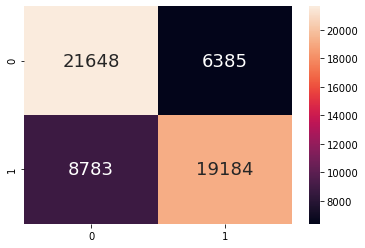

In [39]:
# Import classification metrics
from sklearn.metrics import confusion_matrix                                                        # confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # metrics

# Create model evaluation object
evaluation = ModelEvaluation(y_train)

# Predict target class based on training set
y_train_pred = dectree.predict(X_train)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

We got the accuracy of $72.91$%, which is not that good. It seems like the way the dataset was processed causes this model to be underfitted on the training set.

One way to evaluate the Decision Tree model would be to use the `train_test_split()` function to split the training set into a smaller training set and a validation set, then train the model against the smaller training set and evaluate them against the validation set.

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into $10$ distinct subsets
called folds, then it trains and evaluates the Decision Tree model $10$ times, picking a different fold for evaluation every time and training on the other $9$ folds. After that, it will return the average of predictions made on each test fold.

Accuracy:	 0.72575
Precision:	 0.7459908697178977
Recall:		 0.6836271319769729
F1 score:	 0.7134487648331966
ROC AUC:	 0.7257004136323348


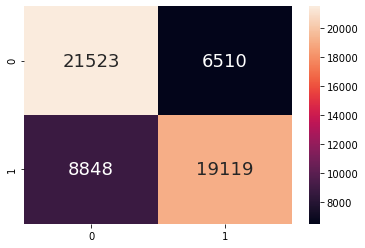

In [40]:
# Import cross-validation predictor
from sklearn.model_selection import cross_val_predict # model validation

# Use cross-validation to predict target class based on training set
y_train_pred = cross_val_predict(dectree, X_train, y_train.values.flatten(), cv=10)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

Check the importance of each feature.

In [41]:
# The impact of each feature on the model
importances = list(zip(dectree.feature_importances_, X_train.columns))  # list of important features
importances.sort(reverse=True)                                          # sort the importances

# Print feature ranking
i = 1
for f in importances:                         # iterate over the list of important features
  print("{}. {} ({})".format(i, f[1], f[0]))  # print the ranking
  i += 1

1. bp (0.6841486379878592)
2. age (0.1639902537110131)
3. cholesterol (0.09226845074873881)
4. weight (0.02946713082941161)
5. height (0.012228396041321036)
6. gluc (0.011037865290498987)
7. active (0.004161865394963023)
8. smoke (0.0014818211591808214)
9. alco (0.0006886183926526189)
10. gender (0.0005269604443607237)


The blood pressure is the most dominant feature in this model, followed by the age. As expected, smoking, alcohol intake and gender didn't contribute much to the prediction of the model.

We have seen that blood pressure category has the highest correlation. However, it is in category form. We believe that reverting back to the numerical `ap_hi`, `ap_lo` will give greater correlation.

Great adventage of the Decision Tree Classifier is that we can actually see the tree and observe how the algorithm classifies training examples at each node.

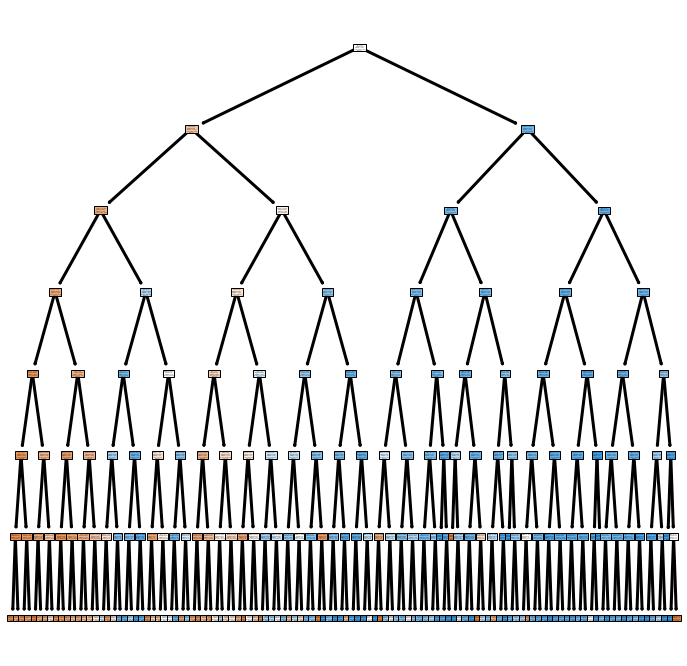

In [42]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

# Setup the frame of the plot
fig, axes = plt.subplots(figsize=(12,12))

# Plot nodes of the tree
out = plot_tree(dectree,
                feature_names=X_train.columns,
                class_names=[str(x) for x in dectree.classes_],
                filled=True)

# Plot connections of nodes
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(3)
        
plt.show()

Now, we will take a step back and change the way we processed the dataset.

---

# **7. Fine-tune the Model**

At this stage, we will fine-tune the model and hopefully, we will make it to perform better on the given dataset.

## 7.1. Reprocess the Data

This time, we will remove the outliers from the original data set. They are training examples with:


*   `ap_hi` and `ap_lo` values those below $40$ or above $200mmHg$
*   `ap_lo` greater than `ap_hi`
*   `bmi` values those below $10$ and above $80kg/m^2$


The height and weight features seems to be in rational ranges but when we combine the two features to calculate the BMI, some unreasonable values start to appear. We will filter out those odd values.

In [43]:
# Create a copy of the dataset
cardio2 = cardio_raw.copy()

# Numerical and categorical attributes
num_attribs = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs:
  cardio2[cat_attrib] = cardio2[cat_attrib].astype('category')

# Remove the id column
cardio2 = cardio2.drop(columns='id')

# Convert the age into years
cardio2['age'] = cardio2['age'] // 365.25

# Convert gender to binary categorical attribute
cardio2['gender'] = (cardio2['gender'].astype('int') - 1).astype('category')

# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure features
ap_hi = cardio2['ap_hi']
ap_lo = cardio2['ap_lo']

# Drop data points those have ap_hi and ap_lo lower than 40 and higher than 200
cardio2 = cardio2.drop(cardio2.loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 200)].index)

# Some data points have ap_lo > ap_hi, we will filter these as well
cardio2 = cardio2.drop(cardio2.loc[ap_lo > ap_hi].index)

# Caculate BMI for every patients
cardio2['bmi'] = cardio2['weight'] / (cardio2['height'] / 100) ** 2

# Extract BMI (bmi) feature
bmi = cardio2['bmi']

# Drop data points those have bmi lower than 10 and higher than 80
cardio2 = cardio2.drop(cardio2.loc[(bmi < 10) | (bmi > 80)].index)

# Drop BMI (bmi) feature
cardio2 = cardio2.drop(columns=['bmi'])

Let's check the infomation of the processed dataset.

In [44]:
# Basic information about the dataset
cardio2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68586 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          68586 non-null  int64   
 1   gender       68586 non-null  category
 2   height       68586 non-null  int64   
 3   weight       68586 non-null  float64 
 4   ap_hi        68586 non-null  int64   
 5   ap_lo        68586 non-null  int64   
 6   cholesterol  68586 non-null  category
 7   gluc         68586 non-null  category
 8   smoke        68586 non-null  category
 9   alco         68586 non-null  category
 10  active       68586 non-null  category
 11  cardio       68586 non-null  category
dtypes: category(7), float64(1), int64(4)
memory usage: 3.6 MB


The dataset is dropped by around $2$%.

## 7.2. Exploratory Analysis

Similar to the above exploration, we will quickly go through some remarkable analysis of this dataset.

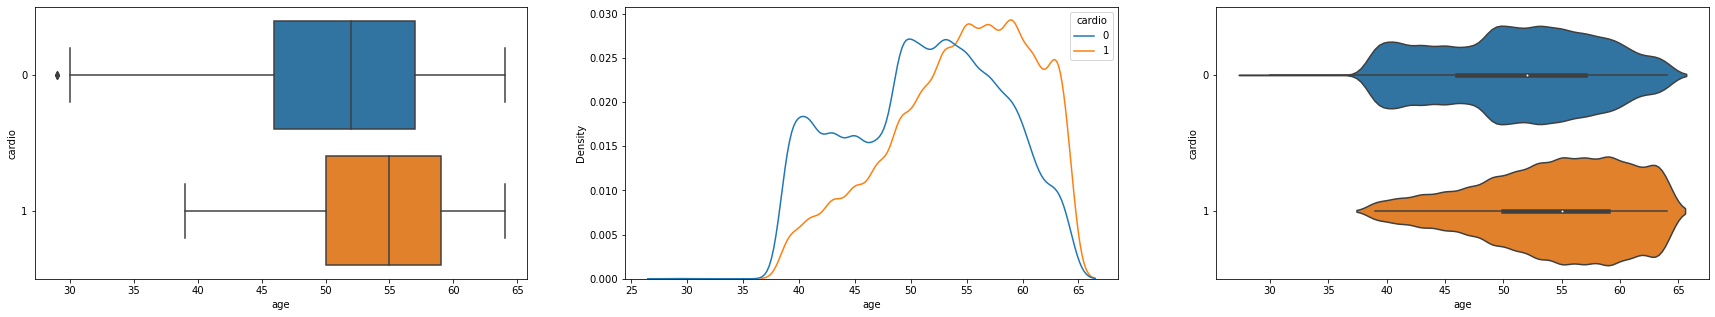

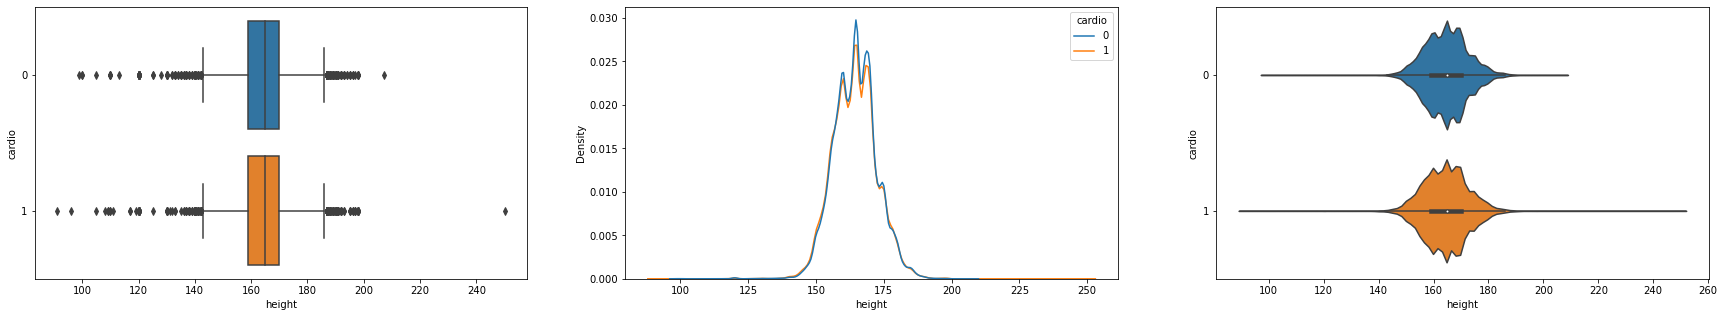

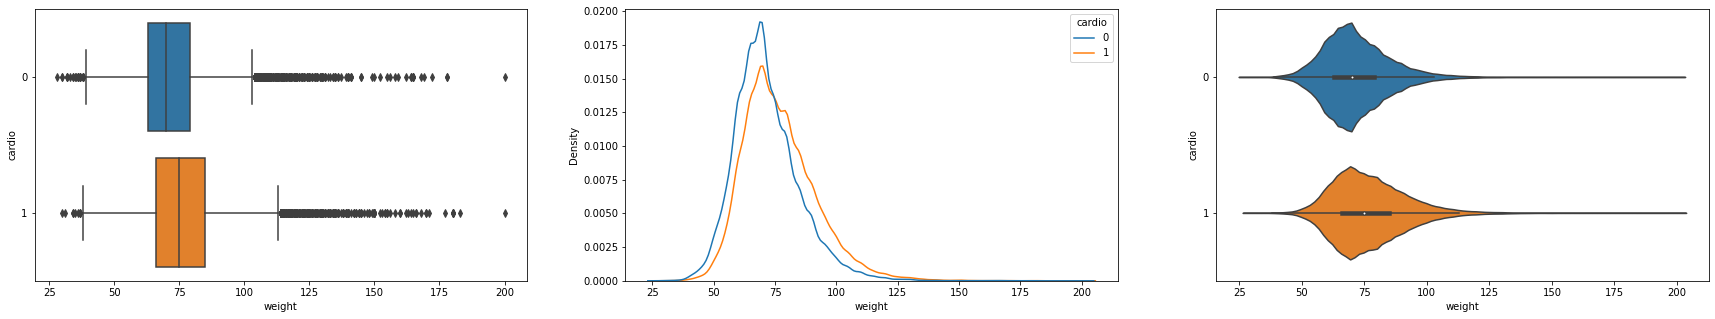

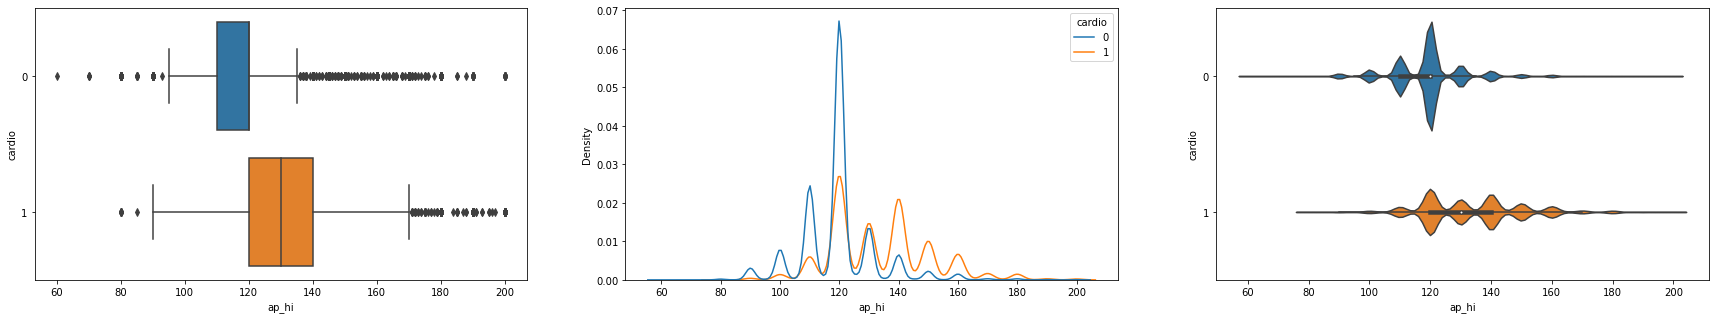

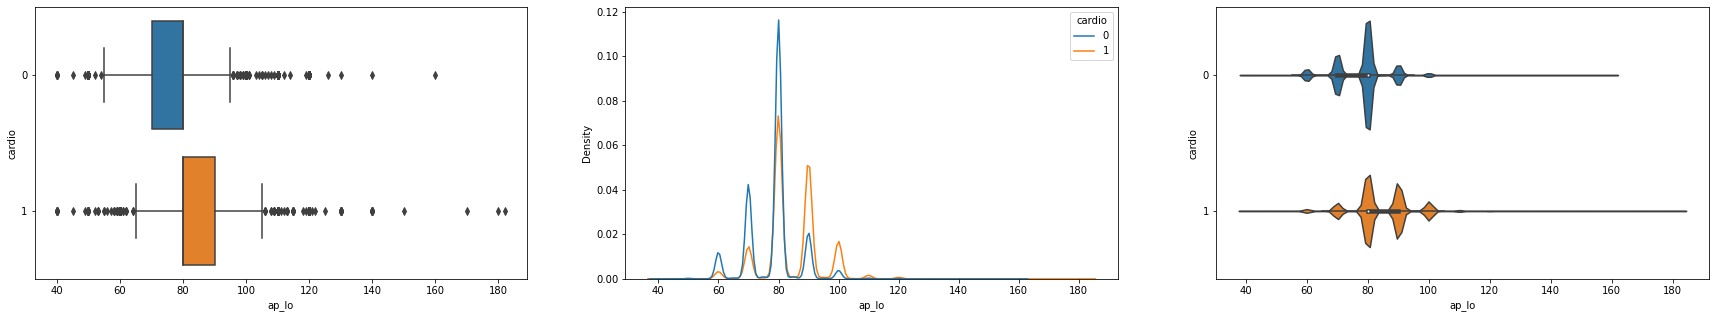

In [45]:
# Bivariate analysis with respect to target class
for attribs in num_attribs:                                                             # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))                            # setup the frame of the plot
  sb.boxplot(data=cardio2, x=attribs, y='cardio', orient='horizontal', ax=axes[0])      # box plot
  sb.kdeplot(data=cardio2, x=attribs, hue='cardio', ax=axes[1])                         # kde plot
  sb.violinplot(data=cardio2, x=attribs, y='cardio', orient='horizontal', ax=axes[2])   # violin plot

The analysis for the age, height and weight features doesn't change that much but the things we want to notice here is the Systolic and Diastolic blood pressure. After removing impratical data points, we can clearly see that the distributions of the two blood pressure features suggest that they might be good predictiors in the Machine Learning model.

Use `catplot()` to observe the correlations between categorical attributes and the target variable `cardio`.

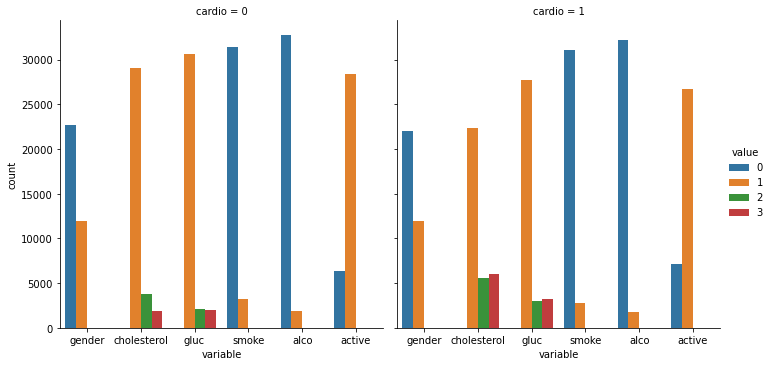

In [46]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio2, id_vars=['cardio'], value_vars=cat_attribs[:-1])        # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')    # categorical plot

It can be seen that patients with CVD have higher cholesterol and glucose level.

Let's take a look at the correlations matrix to see if there is any change.

<AxesSubplot:>

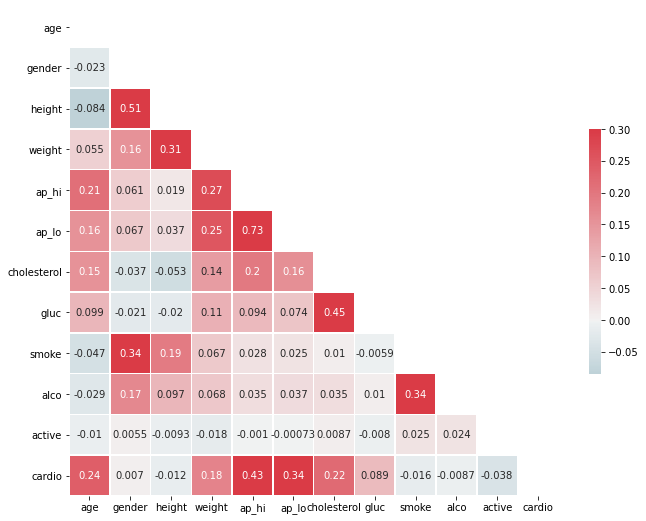

In [47]:
# Calculate the correlations between attributes
corr = cardio2.astype('float').corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

As expected, `ap_hi` and `ap_lo` have slight correlation with target class, followed by `age`, `cholesterol` and `weight`.

## 7.3. Prepare the Data

We will standardize numerical attributes to make it easier for Machine Learning models to train.

In [48]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Define scaler object
scaler = StandardScaler()

# Scale numerical attributes
cardio2[num_attribs] = scaler.fit_transform(cardio2[num_attribs])

With the ratio of $8:2$, let's split the dataset into training set and test set respectively.

In [49]:
# Import splitter
from sklearn.model_selection import train_test_split

# Separate the dataset
cardio2_label = pd.DataFrame(cardio2['cardio']) # label
cardio2 = cardio2.drop('cardio', axis=1)        # predictors

# Split the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cardio2, cardio2_label, test_size=0.2, random_state=42)

## 7.4. Retrain the Model

Let's now retrain the Decision Tree Classifier model.

### 7.4.1. Train and Evaluate on Training Set

We will be using GridSearchCV to find the best combination of hyper-parameters for an estimator. The hyper-parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a hyper-parameter grid.

In [50]:
# Import classification model and hyper-parameter optimizer
from sklearn.model_selection import GridSearchCV  # optimizer
from sklearn.tree import DecisionTreeClassifier   # model

# A dictionary contains hyper-parameters combinations that we want to examine
dectree_param_grid = {
    'criterion': ['gini', 'entropy'],   # measure the quality of a split
    'max_depth': range(5, 10),          # maximum depth of the tree
    'random_state': [42]                # randomness of the estimator
}

# Setup grid search
search_dectree = GridSearchCV(DecisionTreeClassifier(),         # estimator
                              param_grid=dectree_param_grid,    # grid of hyper-parameters
                              scoring='roc_auc',                # performance measurement
                              cv=10,                            # cross-validation strategy
                              verbose=3)

# Fit the training set on the model with combinations of hyper-parameters
search_dectree.fit(X_train, y_train)

# The best hyper-parameters combination
search_dectree.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 2/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 3/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 4/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 5/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 6/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 7/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 8/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 9/10] END ..criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 10/10] END .criterion=gini, max_depth=5, random_state=42; total time=   0.0s
[CV 1/10] END ..criterion=gini, max_depth=6, random_state=42; total time=   0.0s
[CV 2/10] END ..criterion=gini, max_depth=6, r

{'criterion': 'gini', 'max_depth': 6, 'random_state': 42}

Let's create a model object using the best combination of hyper-parameters found and fit it on the training set.

In [51]:
# Create model object with the best found hyper-parameters combination
dectree = search_dectree.best_estimator_

# Fit the training set on the model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

After predicting on the training set, we will plot the confusion matrix and print out some scores to evaluate the model.

Accuracy:	 0.734234891011154
Precision:	 0.7645279213412328
Recall:		 0.6695984985095499
F1 score:	 0.7139213685945225
ROC AUC:	 0.7336257522336519


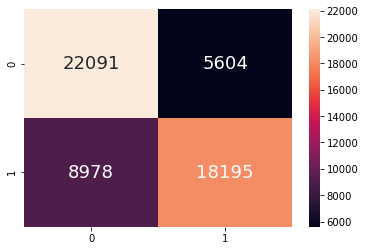

In [52]:
# Import classification metrics
from sklearn.metrics import confusion_matrix                                                        # confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # metrics

# Create model evaluation object
evaluation = ModelEvaluation(y_train)

# Predict target class based on training set
y_train_pred = dectree.predict(X_train)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

We can clearly see that the accuracy of the prediction on the training set has increased from $72.91$% to $73.42$%.

The cross-validation prediction will help to compare between models.

Accuracy:	 0.7294233432966392
Precision:	 0.76027194797517
Recall:		 0.6625694623339344
F1 score:	 0.7080662288118929
ROC AUC:	 0.7287933067221215


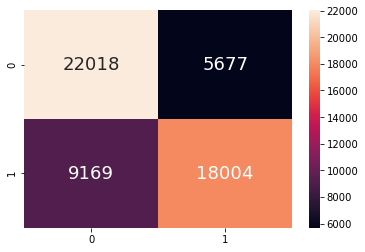

In [53]:
# Import cross-validation predictor
from sklearn.model_selection import cross_val_predict # model validation

# Use cross-validation to predict target class based on training set
y_train_pred = cross_val_predict(dectree, X_train, y_train.values.flatten(), cv=10)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

With the accuracy of $72.94$% compares to that of $72.58$% from the previous training, the Decision Tree Classifier does do better this time.

Check the importance of each feature.

In [54]:
# The impact of each feature on the model
importances = list(zip(dectree.feature_importances_, X_train.columns))  # list of important features
importances.sort(reverse=True)                                          # sort the importances

# Print feature ranking
i = 1
for f in importances:                         # iterate over the list of important features
  print("{}. {} ({})".format(i, f[1], f[0]))  # print the ranking
  i += 1

1. ap_hi (0.7715068748440467)
2. age (0.1196285190111651)
3. cholesterol (0.07671518223395093)
4. weight (0.009091014688636238)
5. ap_lo (0.006712924399592935)
6. active (0.006250617005920727)
7. gluc (0.005416330677076446)
8. height (0.003329713752875033)
9. smoke (0.001348823386736047)
10. gender (0.0)
11. alco (0.0)


The Systolic blood pressure is the most dominant feature in this model as we can see that the feature importances score for it is higher than that of blood pressure feature we created previously. Surprisingly, alcohol intake and gender didn't contribute to the prediction of the model at all.

Let's plot the decision tree for visualization.

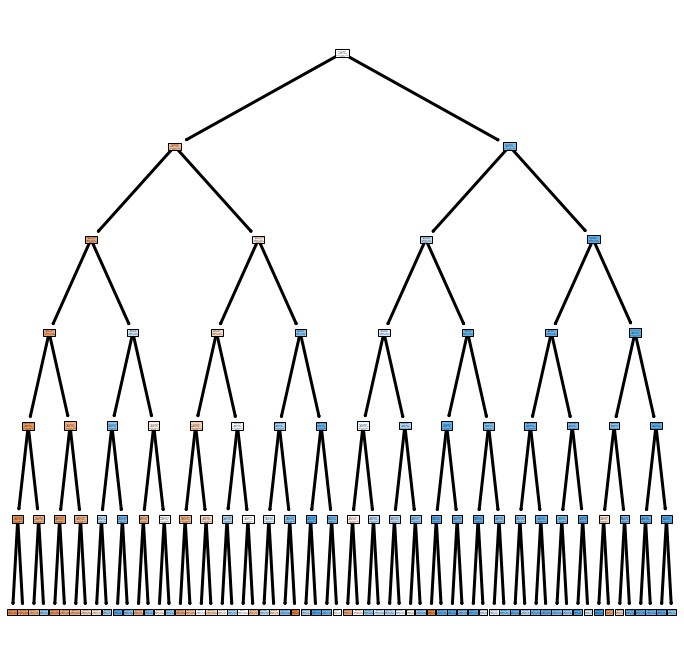

In [55]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(12,12))
out = plot_tree(dectree,
                feature_names=X_train.columns,
                class_names=[str(x) for x in dectree.classes_],
                filled=True)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(3)
        
plt.show()

After tweaking the model for a while, we eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

### 7.4.2. Evaluate on Test Set

There is nothing special about this process, just get the predictors and the labels from the test set and evaluate the final model on the test set.

Accuracy:	 0.727219711328182
Precision:	 0.7534223424032449
Recall:		 0.6613262127280819
F1 score:	 0.704376678780218
ROC AUC:	 0.7261052734845799


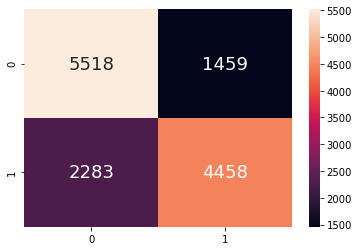

In [56]:
# Create model evaluation object
evaluation = ModelEvaluation(y_test)

# Predict target class based on test set
y_test_pred = dectree.predict(X_test)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_pred)

As expected, the accuracy on test set is $72.72$%, which is a bit lower than the accuracy on training set.

Plot ROC curve and calculate geometric mean to find the best threshold for the model.

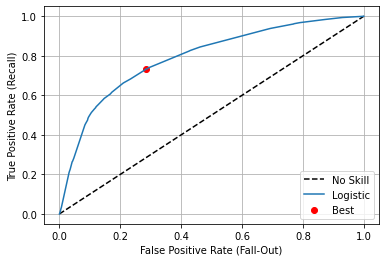

Best Threshold = 0.4744525547445255
G-Mean = 0.7243216638752316


In [57]:
# Import essential libraries
from sklearn.metrics import roc_curve # roc curve metric
from numpy import sqrt                # calculate square root
from numpy import argmax              # find max value

# Predict target class probabilities based on test set
y_test_probas = dectree.predict_proba(X_test)

# Plot Receiver Operating Characteristic (ROC) curve
evaluation.plot_roc_curve(y_test_probas)

Recalculate the metrics using new threshold.

Accuracy:	 0.7237206589881907
Precision:	 0.7146806343663611
Recall:		 0.7286752707313455
F1 score:	 0.7216101072425445
ROC AUC:	 0.7238044549156227


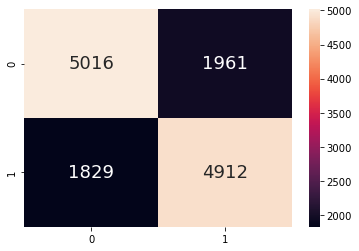

In [58]:
# Set threshold to best threshold
threshold = evaluation.best_threshold()

# Use new threshold value to make new prediction based on test set
y_test_newpred = [1 if y_test_probas[i][1] > threshold else 0 for i in range(len(y_test_probas))]

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_newpred)

Let's train and evaluate on other classification models to see which performs best.

---

# **8. More Classification Models**

[Random Forest Classifier](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) is a good start.

## 8.1. Random Forest Classifier

The Random Forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

### 8.1.1. Train and Evaluate on Training Set

We will be using GridSearchCV to find the best combination of hyper-parameters for an estimator. The hyper-parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a hyper-parameter grid.

In [59]:
# Import classification model and hyper-parameter optimizer
from sklearn.model_selection import GridSearchCV    # optimizer
from sklearn.ensemble import RandomForestClassifier # model

# A dictionary contains hyper-parameters combinations that we want to examine
ranfor_param_grid = {
    'n_estimators': range(300, 450, 50),    # number of estimators
    'criterion': ['gini', 'entropy'],       # measure the quality of a split
    'max_depth': range(5, 10),              # maximum depth of the tree
    'random_state': [42]                    # randomness of the estimator
}

search_ranfor = GridSearchCV(RandomForestClassifier(),      # estimator
                             param_grid=ranfor_param_grid,  # grid of hyper-parameters
                             scoring='roc_auc',             # performance measurement
                             cv=10,                         # cross-validation strategy
                             verbose=3)

# Fit the training set on the model with combinations of hyper-parameters
search_ranfor.fit(X_train, y_train.values.flatten())

# The best hyper-parameters combination
search_ranfor.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   3.8s
[CV 2/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   3.8s
[CV 3/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   3.9s
[CV 4/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   3.8s
[CV 5/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   3.7s
[CV 6/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   4.3s
[CV 7/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   4.3s
[CV 8/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   4.5s
[CV 9/10] END criterion=gini, max_depth=5, n_estimators=300, random_state=42; total time=   4.5s
[CV 10/10] END criterion=gini, max_depth=5, n_estimators=300, ra

{'criterion': 'entropy',
 'max_depth': 9,
 'n_estimators': 350,
 'random_state': 42}

Let's create a model object using the best combination of hyper-parameters found and fit it on the training set.

In [60]:
# Create model object with the best found hyper-parameters combination
ranfor = search_ranfor.best_estimator_

# Fit the training set on the model
ranfor.fit(X_train, y_train.values.flatten())

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=350,
                       random_state=42)

After predicting on the training set, we will plot the confusion matrix and print out some scores to evaluate the model.

Accuracy:	 0.7452431289640592
Precision:	 0.780565596427812
Recall:		 0.6754866963529974
F1 score:	 0.7242345328282827
ROC AUC:	 0.7445857384996618


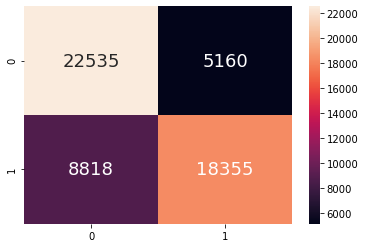

In [61]:
# Import classification metrics
from sklearn.metrics import confusion_matrix                                                        # confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # metrics

# Create model evaluation object
evaluation = ModelEvaluation(y_train)

# Predict target class based on training set
y_train_pred = ranfor.predict(X_train)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

The cross-validation prediction will help to compare between models.

Accuracy:	 0.7344535977254502
Precision:	 0.7679323100471959
Recall:		 0.6646671328156626
F1 score:	 0.7125779215655329
ROC AUC:	 0.7337959242341537


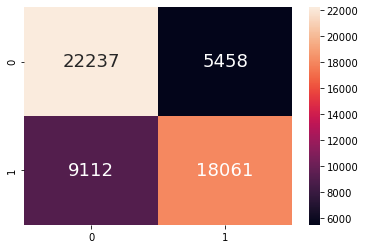

In [62]:
# Import cross-validation predictor
from sklearn.model_selection import cross_val_predict # model validation

# Use cross-validation to predict target class based on training set
y_train_pred = cross_val_predict(ranfor, X_train, y_train.values.flatten(), cv=10)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

Check the importance of each feature.

In [63]:
# The impact of each feature on the model
importances = list(zip(ranfor.feature_importances_, X_train.columns))   # list of important features
importances.sort(reverse=True)                                          # sort the importances

# Print feature ranking
i = 1
for f in importances:                         # iterate over the list of important features
  print("{}. {} ({})".format(i, f[1], f[0]))  # print the ranking
  i += 1

1. ap_hi (0.47376071492121036)
2. ap_lo (0.19549493521024625)
3. age (0.1266145786546227)
4. cholesterol (0.09180357718470566)
5. weight (0.05384736965711177)
6. height (0.025017761460550715)
7. gluc (0.012811742614474953)
8. active (0.007529887873926873)
9. smoke (0.005180937622944502)
10. alco (0.004018483228233092)
11. gender (0.003920011571973103)


After tweaking the model for a while, we eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

### 8.1.2. Evaluate on Test Set

There is nothing special about this process, just get the predictors and the labels from the test set and evaluate the final model on the test set.

Accuracy:	 0.7261991543956845
Precision:	 0.7558717641008058
Recall:		 0.6540572615338971
F1 score:	 0.7012883728328297
ROC AUC:	 0.7249790392519708


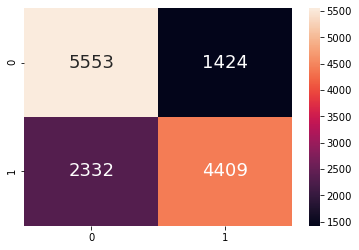

In [64]:
# Create model evaluation object
evaluation = ModelEvaluation(y_test)

# Predict target class based on test set
y_test_pred = ranfor.predict(X_test)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_pred)

Plot ROC curve and calculate geometric mean to find the best threshold for the model.

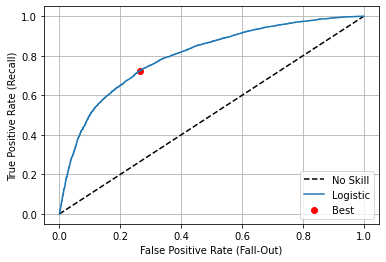

Best Threshold = 0.44857832559700617
G-Mean = 0.7302968248604884


In [65]:
# Import essential libraries
from sklearn.metrics import roc_curve # roc curve metric
from numpy import sqrt                # calculate square root
from numpy import argmax              # find max value

# Predict target class probabilities based on test set
y_test_probas = ranfor.predict_proba(X_test)

# Plot roc curve
evaluation.plot_roc_curve(y_test_probas)

Recalculate the metrics using new threshold.

Accuracy:	 0.7303542790494241
Precision:	 0.7263392857142857
Recall:		 0.724076546506453
F1 score:	 0.725206151103187
ROC AUC:	 0.7302481055593754


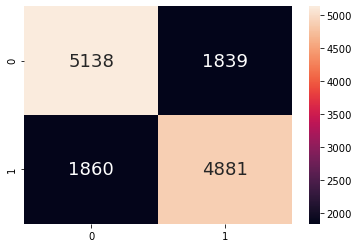

In [66]:
# Set threshold to best threshold
threshold = evaluation.best_threshold()

# Use new threshold value to make new prediction based on test set
y_test_newpred = [1 if y_test_probas[i][1] > threshold else 0 for i in range(len(y_test_probas))]

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_newpred)

Next stop, [AdaBoost Classifier](https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe).

## 8.2. AdaBoost Classifier

The idea behind AdaBoost Algorithm is that it increases the weights of those observations that are difficult to classify and lowers the weights for those that are easy to classify. After that, subsequent trees will help to classify observations that are not well classified by the previous trees.

### 8.2.1. Train and Evaluate on Training Set

We will be using GridSearchCV to find the best combination of hyper-parameters for an estimator. The hyper-parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a hyper-parameter grid.

In [67]:
# Import classification model and hyper-parameter optimizer
from sklearn.model_selection import GridSearchCV  # optimizer
from sklearn.ensemble import AdaBoostClassifier   # model

# A dictionary contains hyper-parameters combinations that we want to examine
ada_param_grid = {
    'n_estimators': range(250, 500, 50),    # number of estimators
    'learning_rate': [0.1, 0.3, 1],         # learning rate
    'random_state': [42]                    # randomness of the estimator
}

# Setup grid search
search_ada = GridSearchCV(AdaBoostClassifier(),         # estimator
                          param_grid=ada_param_grid,    # grid of hyper-parameters
                          scoring='roc_auc',            # performance measurement
                          cv=10,                        # cross-validation strategy
                          verbose=3)

# Fit the training set on the model with combinations of hyper-parameters
search_ada.fit(X_train, y_train.values.flatten())

# The best hyper-parameters combination
search_ada.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   5.0s
[CV 2/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 3/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 4/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 5/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 6/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 7/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 8/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 9/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.8s
[CV 10/10] END learning_rate=0.1, n_estimators=250, random_state=42; total time=   4.9s
[CV 1/10] END learning_rate=0.1, n_estimators=300, random_state=42

{'learning_rate': 0.1, 'n_estimators': 450, 'random_state': 42}

In [68]:
# Create model object with the best found hyper-parameters combination
ada = search_ada.best_estimator_

# Fit the training set on the model
ada.fit(X_train, y_train.values.flatten())

AdaBoostClassifier(learning_rate=0.1, n_estimators=450, random_state=42)

After predicting on the training set, we will plot the confusion matrix and print out some scores to evaluate the model.

Accuracy:	 0.7306080046657433
Precision:	 0.769133871948571
Recall:		 0.6516394950870349
F1 score:	 0.7055284390875585
ROC AUC:	 0.7298637988163102


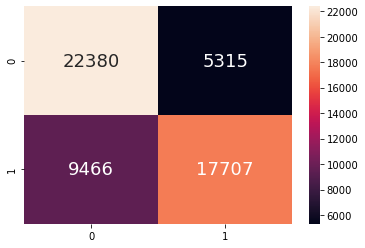

In [69]:
# Import classification metrics
from sklearn.metrics import confusion_matrix                                                        # confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # metrics

# Create model evaluation object
evaluation = ModelEvaluation(y_train)

# Predict target class based on training set
y_train_pred = ada.predict(X_train)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

The cross-validation prediction will help to compare between models.

Accuracy:	 0.7297878544871328
Precision:	 0.7683780376472634
Recall:		 0.6504618555183455
F1 score:	 0.7045200892857144
ROC AUC:	 0.7290402796277411


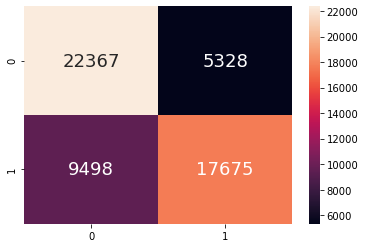

In [70]:
# Import cross-validation predictor
from sklearn.model_selection import cross_val_predict # model validation

# Use cross-validation to predict target class based on training set
y_train_pred = cross_val_predict(ada, X_train, y_train.values.flatten(), cv=10)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

Check the importance of each feature.

In [71]:
# The impact of each feature on the model
importances = list(zip(ada.feature_importances_, X_train.columns))   # list of important features
importances.sort(reverse=True)                                       # sort the importances

# Print feature ranking
i = 1
for f in importances:                         # iterate over the list of important features
  print("{}. {} ({})".format(i, f[1], f[0]))  # print the ranking
  i += 1

1. age (0.29333333333333333)
2. weight (0.16666666666666666)
3. ap_hi (0.14444444444444443)
4. cholesterol (0.09555555555555556)
5. ap_lo (0.09111111111111111)
6. gluc (0.057777777777777775)
7. height (0.04666666666666667)
8. active (0.044444444444444446)
9. alco (0.03111111111111111)
10. smoke (0.02666666666666667)
11. gender (0.0022222222222222222)


After tweaking the model for a while, we eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

### 8.2.2. Evaluate on Test Set

There is nothing special about this process, just get the predictors and the labels from the test set and evaluate the final model on the test set.

Accuracy:	 0.7216795451231958
Precision:	 0.7568992793109509
Recall:		 0.638777629431835
F1 score:	 0.6928399034593725
ROC AUC:	 0.7202774487993345


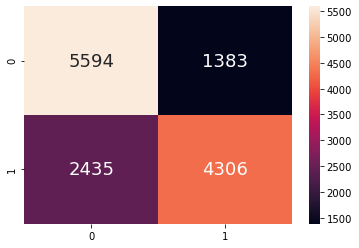

In [72]:
# Create model evaluation object
evaluation = ModelEvaluation(y_test)

# Predict target class based on test set
y_test_pred = ada.predict(X_test)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_pred)

Plot ROC curve and calculate geometric mean to find the best threshold for the model.

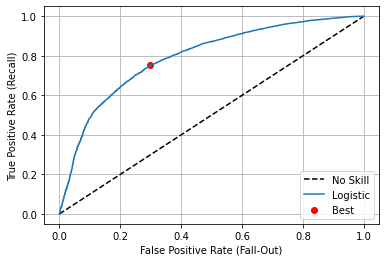

Best Threshold = 0.49753386521764315
G-Mean = 0.7266891143809221


In [73]:
# Import essential libraries
from sklearn.metrics import roc_curve # roc curve metric
from numpy import sqrt                # calculate square root
from numpy import argmax              # find max value

# Predict target class probabilities based on test set
y_test_probas = ada.predict_proba(X_test)

# Plot roc curve
evaluation.plot_roc_curve(y_test_probas)

Recalculate the metrics using new threshold.

Accuracy:	 0.7266365359381834
Precision:	 0.7087812369119084
Recall:		 0.7531523512831924
F1 score:	 0.7302934407364787
ROC AUC:	 0.7270849903183914


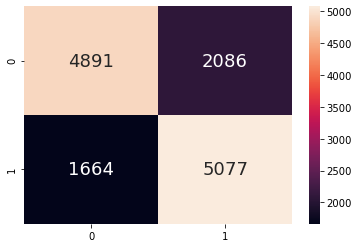

In [74]:
# Set threshold to best threshold
threshold = evaluation.best_threshold()

# Use new threshold value to make new prediction based on test set
y_test_newpred = [1 if y_test_probas[i][1] > threshold else 0 for i in range(len(y_test_probas))]

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_newpred)

Lastly, let's give it a try with the [Gradient Boosting Classifier](https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab).

## 8.3. Gradient Boosting Classifier

Gradient Boosting trains many models in a gradual, additive and sequential manner. While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function. The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise.

### 8.3.1. Train and Evaluate on Training Set

We will be using GridSearchCV to find the best combination of hyper-parameters for an estimator. The hyper-parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a hyper-parameter grid.

In [75]:
# Import classification model and hyper-parameter optimizer
from sklearn.model_selection import GridSearchCV  # optimizer
from sklearn.ensemble import GradientBoostingClassifier   # model

# A dictionary contains hyper-parameters combinations that we want to examine
gb_param_grid = {
    'learning_rate': [0.03],                # learning rate
    'n_estimators': range(300, 450, 50),    # number of estimators
    'max_depth': range(3, 8),               # maximum depth of the tree
    'random_state': [42]                    # randomness of the estimator
}

# Setup grid search
search_gb = GridSearchCV(GradientBoostingClassifier(),  # estimator
                         param_grid=gb_param_grid,      # grid of hyper-parameters
                         scoring='roc_auc',             # performance measurement
                         cv=10,                         # cross-validation strategy
                         verbose=3)

# Fit the training set on the model with combinations of hyper-parameters
search_gb.fit(X_train, y_train.values.flatten())

# The best hyper-parameters combination
search_gb.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 2/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 3/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.3s
[CV 4/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 5/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 6/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 7/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 8/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 9/10] END learning_rate=0.03, max_depth=3, n_estimators=300, random_state=42; total time=   8.4s
[CV 10/10] END learning_rate

{'learning_rate': 0.03,
 'max_depth': 4,
 'n_estimators': 300,
 'random_state': 42}

Let's create a model object using the best combination of hyper-parameters found and fit it on the training set.

In [76]:
# Create model object with the best found hyper-parameters combination
gb = search_gb.best_estimator_

# Fit the training set on the model
gb.fit(X_train, y_train.values.flatten())

GradientBoostingClassifier(learning_rate=0.03, max_depth=4, n_estimators=300,
                           random_state=42)

After predicting on the training set, we will plot the confusion matrix and print out some scores to evaluate the model.

Accuracy:	 0.7417073704162718
Precision:	 0.7631461765777436
Recall:		 0.6937769109042063
F1 score:	 0.7268100855887116
ROC AUC:	 0.7412556697507131


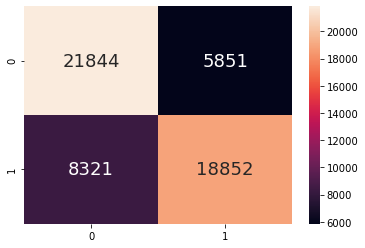

In [77]:
# Import classification metrics
from sklearn.metrics import confusion_matrix                                                        # confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # metrics

# Create model evaluation object
evaluation = ModelEvaluation(y_train)

# Predict target class based on training set
y_train_pred = gb.predict(X_train)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

The cross-validation prediction will help to compare between models.

Accuracy:	 0.735875191368375
Precision:	 0.7558406972521486
Recall:		 0.6893607625216207
F1 score:	 0.7210716760335668
ROC AUC:	 0.7354368354944265


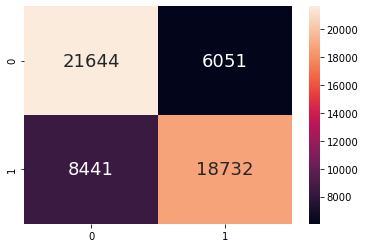

In [78]:
# Import cross-validation predictor
from sklearn.model_selection import cross_val_predict # model validation

# Use cross-validation to predict target class based on training set
y_train_pred = cross_val_predict(gb, X_train, y_train.values.flatten(), cv=10)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

Check the importance of each feature.

In [79]:
# The impact of each feature on the model
importances = list(zip(gb.feature_importances_, X_train.columns))      # list of important features
importances.sort(reverse=True)                                          # sort the importances

# Print feature ranking
i = 1
for f in importances:                         # iterate over the list of important features
  print("{}. {} ({})".format(i, f[1], f[0]))  # print the ranking
  i += 1

1. ap_hi (0.7353278880329075)
2. age (0.12483975741391592)
3. cholesterol (0.0760607204177325)
4. weight (0.023349809122121833)
5. ap_lo (0.011895650536500322)
6. active (0.007408672214256073)
7. height (0.006836508554630759)
8. gluc (0.006472859764566464)
9. smoke (0.004294108455019044)
10. alco (0.0023824651773115936)
11. gender (0.0011315603110381395)


After tweaking the model for a while, we eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

### 8.3.2. Evaluate on Test Set

There is nothing special about this process, just get the predictors and the labels from the test set and evaluate the final model on the test set.

Accuracy:	 0.7303542790494241
Precision:	 0.7477198697068403
Recall:		 0.6810562231122979
F1 score:	 0.7128328545920347
ROC AUC:	 0.7295205151680165


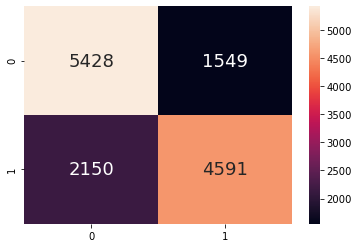

In [80]:
# Create model evaluation object
evaluation = ModelEvaluation(y_test)

# Predict target class based on test set
y_test_pred = gb.predict(X_test)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_pred)

Plot ROC curve and calculate geometric mean to find the best threshold for the model.

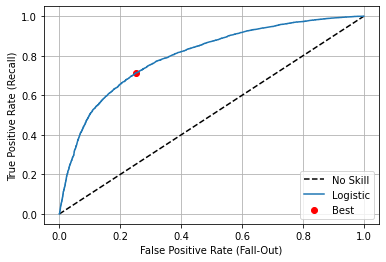

Best Threshold = 0.47348937117511725
G-Mean = 0.7309025748890137


In [81]:
# Import essential libraries
from sklearn.metrics import roc_curve # roc curve metric
from numpy import sqrt                # calculate square root
from numpy import argmax              # find max value

# Predict target class probabilities based on test set
y_test_probas = gb.predict_proba(X_test)

# Plot roc curve
evaluation.plot_roc_curve(y_test_probas)

Recalculate the metrics using new threshold.

Accuracy:	 0.7313019390581718
Precision:	 0.7331705083193406
Recall:		 0.7125055629728527
F1 score:	 0.722690340054168
ROC AUC:	 0.7309840413402318


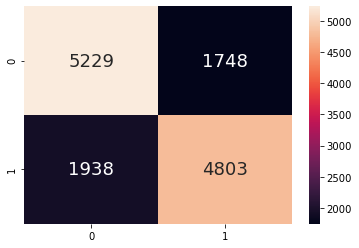

In [82]:
# Set threshold to best threshold
threshold = evaluation.best_threshold()

# Use new threshold value to make new prediction based on test set
y_test_newpred = [1 if y_test_probas[i][1] > threshold else 0 for i in range(len(y_test_probas))]

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_newpred)

Feel free to try other classification models [here](https://scikit-learn.org/stable/supervised_learning.html).

---

# **9. Conclusion**

## 9.1. Model Decision

<table>
    <thead>
        <tr>
            <th rowspan=2><center> Model </center></th>
            <th colspan=3><center> Accuracy </center></th>
        </tr>
        <tr>
            <th><em><center> Train </center></em></th>
            <th><em><center> Validation </center></em></th>
            <th><em><center> Test </center></em></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> Decision Tree </td>
            <td><center> 73.42% </center></td>
            <td><center> 72.94% </center></td>
            <td><center> 72.37% </center></td>
        </tr>
        <tr>
            <td> Random Forest </td>
            <td><center> 74.52% </center></td>
            <td><center> 73.45% </center></td>
            <td><center> 73.04% </center></td>
        </tr>
        <tr>
            <td> AdaBoost </td>
            <td><center> 73.06% </center></td>
            <td><center> 72.98% </center></td>
            <td><center> 72.66% </center></td>
        </tr>
        <tr>
            <td> Gradient Boosting </td>
            <td><center> 74.17% </center></td>
            <td><center> 73.59% </center></td>
            <td><center> 73.13% </center></td>
        </tr>
    </tbody>
</table>

Based on the various metrics and Grid Search, we choose Random Forest Classifier with the following hyper-parameters:


*   `max_depth=9`
*   `n_estimator=350`



## 9.2. Discussion

The data are rudimentary, cannot fully predict disease. Human expertise and more features are required.

Prediction is useful to alert risky patients to seek further medical advice.